# Import Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (20,5)

# Import Data

In [2]:
nbfi = pd.read_csv(r'C:\Users\Ben\Desktop\Data Analysis\Final Project\NBFI\Train_Dataset.csv')

C:\Users\Ben\AppData\Local\Temp\ipykernel_7024\926577675.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  nbfi = pd.read_csv(r'C:\Users\Ben\Desktop\Data Analysis\Final Project\NBFI\Train_Dataset.csv')


In [12]:
nbfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

Own_House_Age, Score_Source_1, Social_Circle_Default has the most null values and will be discared.  We will also
be discarding the personal information that could be subject to discrimination such as marital status and gender.
We have several columns that is incorrect in terms of data dype. Below we will correct

# Clean data types

In [3]:
nbfi['Loan_Annuity'] = pd.to_numeric(nbfi['Loan_Annuity'], errors='coerce')
nbfi['Credit_Amount'] = pd.to_numeric(nbfi['Credit_Amount'], errors='coerce')
nbfi['Client_Income'] = pd.to_numeric(nbfi['Client_Income'], errors='coerce')
nbfi['Score_Source_3'] = pd.to_numeric(nbfi['Score_Source_3'], errors='coerce')
nbfi['Age_Days'] = pd.to_numeric(nbfi['Age_Days'], errors='coerce')
nbfi['Registration_Days'] = pd.to_numeric(nbfi['Registration_Days'], errors='coerce')
nbfi['ID_Days'] = pd.to_numeric(nbfi['ID_Days'], errors='coerce')
nbfi['Population_Region_Relative'] = pd.to_numeric(nbfi['Population_Region_Relative'], errors='coerce')
nbfi['Employed_Days'] = pd.to_numeric(nbfi['Employed_Days'], errors='coerce')
nbfi['Cleint_City_Rating'] = nbfi['Cleint_City_Rating'].astype(str)
nbfi['Application_Process_Day'] = nbfi['Application_Process_Day'].astype(str)
nbfi['Credit_Bureau'] = nbfi['Credit_Bureau'].astype(str)

In [5]:
round((nbfi['Default'].mean()) * 100,1)

8.1

Overall Default rate is at 8.1% and in order to decrease the default rate we are interested in areas that would more
significantly impact the percentage; 9% or higher and 1000 or more counts.

# Correlation 

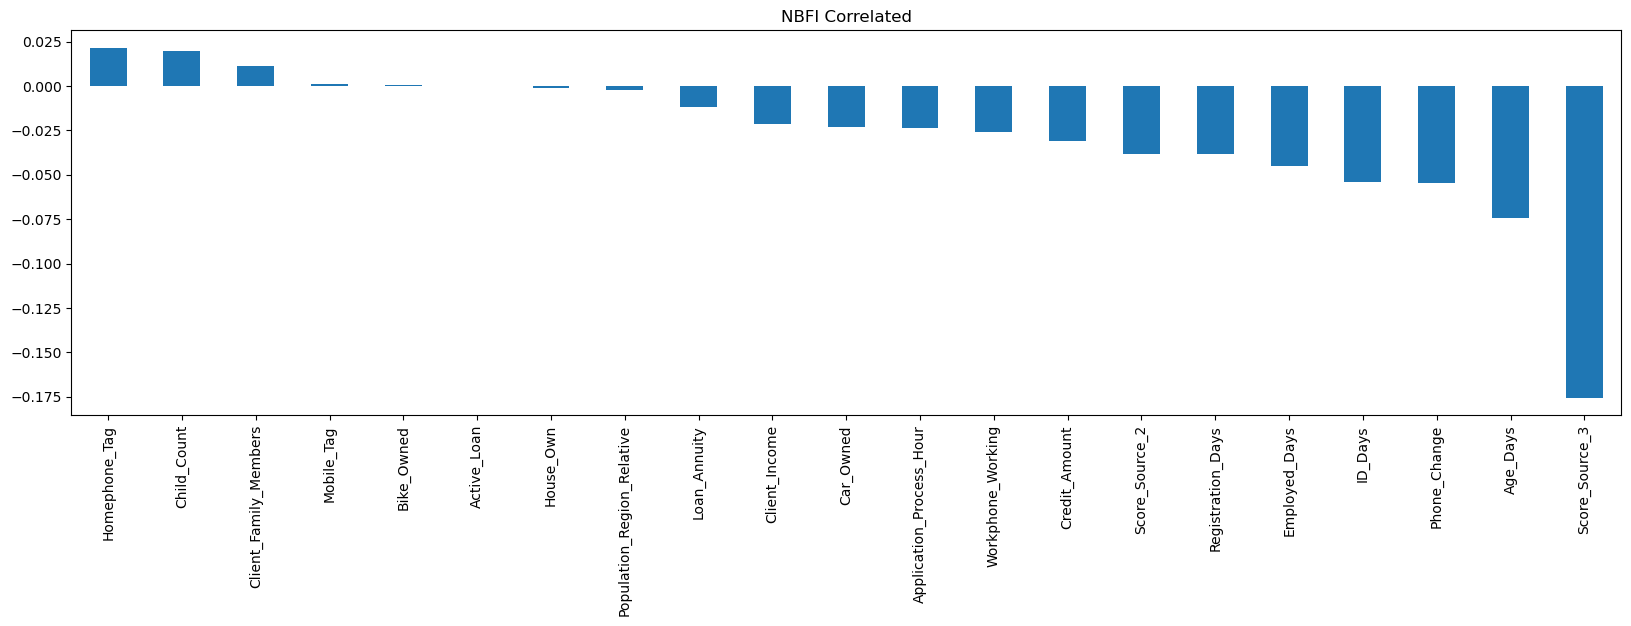

In [46]:
nbfiheat = nbfi.corr()
corrnbfi = nbfiheat['Default'].sort_values(ascending=False).drop(['Default', 'ID', 'Own_House_Age', 'Score_Source_1', 'Social_Circle_Default'])

corrnbfi.plot(kind='bar')
plt.title('NBFI Correlated')
plt.show()

There is no positive correlation with loans default for the numerical columns. Score Source 3 have the highest
negative correlation.

In [37]:
#grouping of variables

demographic = ['Client_Education', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Cleint_City_Rating']#
demographic2 = ['Population_Region_Relative', 'Age_Days', 'Client_Income',]
financial = ['Credit_Amount', 'Loan_Annuity']
financial2 = ['Client_Income_Type', 'Loan_Contract_Type']
app_change = ['Employed_Days', 'Registration_Days', 'ID_Days','Phone_Change', 'Application_Process_Day']
personal = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Credit_Bureau']
score_source = ['Score_source_2', 'Score_Source_3']

# Functions for automation

In [5]:
# Population Region 
def group(value):
    if value < 0.01:
        return '<0.01'
    elif value < 0.02:
        return '<0.02'
    elif value < 0.03:
        return '<0.03'
    elif value < 0.04:
        return '<0.04'
    else:
        return '>0.04'

nbfi['prr'] = nbfi['Population_Region_Relative'].apply(group)

In [6]:
#Age groups
def group(value):
    if value < 8760:
        return '<24'
    elif value < 10950:
        return '24-30'
    elif value < 12775:
        return '30-35'
    elif value < 14965:
        return '35-41'
    elif value < 16790:
        return '41-46'
    elif value < 19710:
        return '46-54'
    elif value < 21900:
        return '54-60'
    else:
        return '60+'

nbfi['ad'] = nbfi['Age_Days'].apply(group)

In [7]:
#Client income
def group(value):
    if value < 25000:
        return '<25k'
    elif value < 50000:
        return '25k - 50k'
    elif value < 75000:
        return '50k - 75k'
    else:
        return '>75K'

nbfi['ci'] = nbfi['Client_Income'].apply(group)

In [8]:
#credit amount
def group(value):
    if value < 40000:
        return '<40k'
    elif value < 80000:
        return '40k - 80k'
    else:
        return '>80K'

nbfi['ca'] = nbfi['Credit_Amount'].apply(group)

In [9]:
#loan annuity

def group(value):
    if value < 1500:
        return '<1.5k'
    elif value < 3000:
        return '1.5k - 3k'
    elif value < 5000:
        return '3k - 5k'
    else:
        return '>5K'

nbfi['la'] = nbfi['Loan_Annuity'].apply(group)

In [10]:
# score group 2
def group(value):
    if value < 0.10:
        return '<0.10'
    elif value < 0.20:
        return '<0.20'
    elif value < 0.30:
        return '<0.30'
    elif value < 0.40:
        return '<0.40'
    elif value < 0.50:
        return '<0.50'
    elif value < 0.60:
        return '<0.60'
    else:
        return '>0.60'
nbfi['scoregroup2'] = nbfi['Score_Source_2'].apply(group)

In [11]:
# score group 3
def group(value):
    if value < 0.10:
        return '<0.10'
    elif value < 0.20:
        return '<0.20'
    elif value < 0.30:
        return '<0.30'
    elif value < 0.40:
        return '<0.40'
    elif value < 0.50:
        return '<0.50'
    elif value < 0.60:
        return '<0.60'
    else:
        return '>0.60'
nbfi['scoregroup3'] = nbfi['Score_Source_3'].apply(group)

In [11]:
# Clean up field for charge labels
def field_label(col):
    return ' '.join([s.capitalize() for s in col.split('_')])

In [12]:
# Combo countplot with default % on secondary axis
def combo_chart(x, df, order):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.countplot(x=x, data=df, color='tab:blue', order=order, ax=ax)
    x_label = field_label(x)
    ax.set_xlabel(x_label, size=10)
    plt.xticks(rotation = 90)
    ax.set_ylabel('Count', size=10)
    ax2 = ax.twinx()
    x_co = df.groupby(x).mean()['Default']
    # If x is an object dtype make sure the order is the same as the countplot
    if df[x].dtype == 'O':
        # Get labels for xaxis
        x_labels = [label.get_text() for label in ax.get_xticklabels()]
        # Make sure Series index is the same order as countplot
        x_co = pd.Series(x_co, index=x_labels)
    # Treat values as a string for x axis
    x_co.index = x_co.index.map(str)
    sns.scatterplot(x=x_co.index, y=x_co, color='tab:red',  marker='o', s=100, label='Default %', ax=ax2)
    plt.legend()
    ax2.set_ylabel('Default %', size=10)
    # Make sure default % scaling is appropriate
    ax2.set_ylim(bottom=0, top=0.4)
    plt.title(x_label + ' Frequency and Default %', size=15)

In [13]:
# Violin plots with a categorical variable on the x-axis
def violinplot_default(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    x_label = field_label(x)
    y_label = field_label(y)
    sns.violinplot(x=x, y=y, data=df, ax=ax)
    plt.xlabel(x_label, size=10)
    plt.ylabel(y_label, size=10)
    plt.title(y_label + ' Distribution by ' + x_label, size=15)

In [14]:
# Boxplots with a categorical variable on the x-axis
def boxplot_default(x, y, df, order):
    fig, ax = plt.subplots(figsize=(10,5))
    x_label = field_label(x)
    y_label = field_label(y)
    sns.boxplot(x=x, y=y, data=df, order=order, ax=ax)
    plt.xlabel(x_label, size=10)
    plt.ylabel(y_label, size=10)
    plt.title(y_label + ' Distribution by ' + x_label, size=15)

# Demographic group

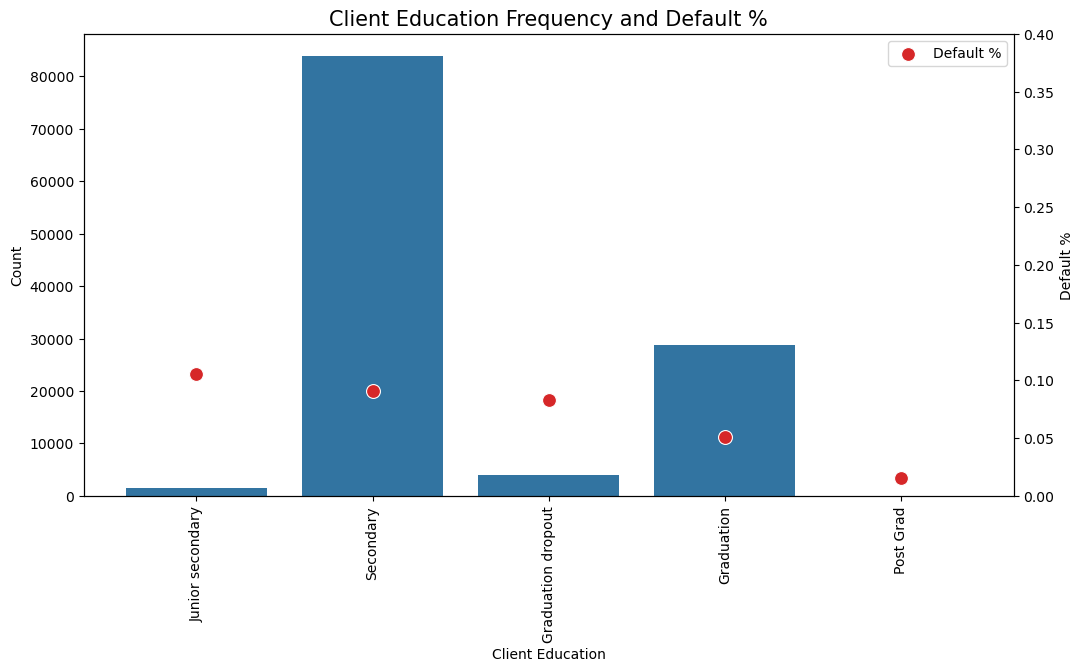

In [13]:
education_order = ['Junior secondary', 'Secondary', 'Graduation dropout', 'Graduation', 'Post Grad']
combo_chart('Client_Education',nbfi, education_order)

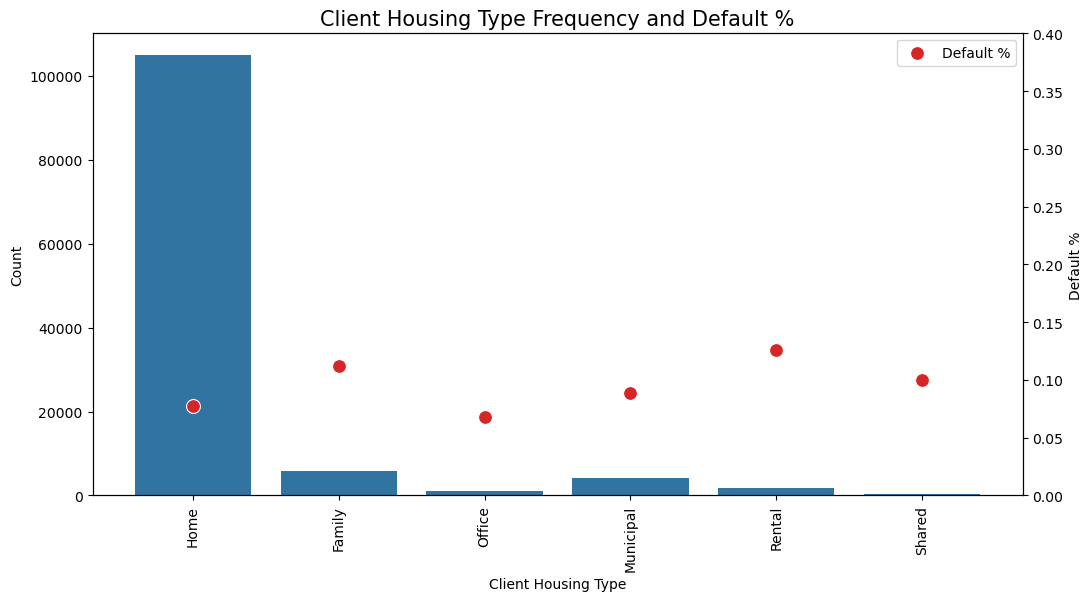

In [14]:
combo_chart('Client_Housing_Type',nbfi, None)

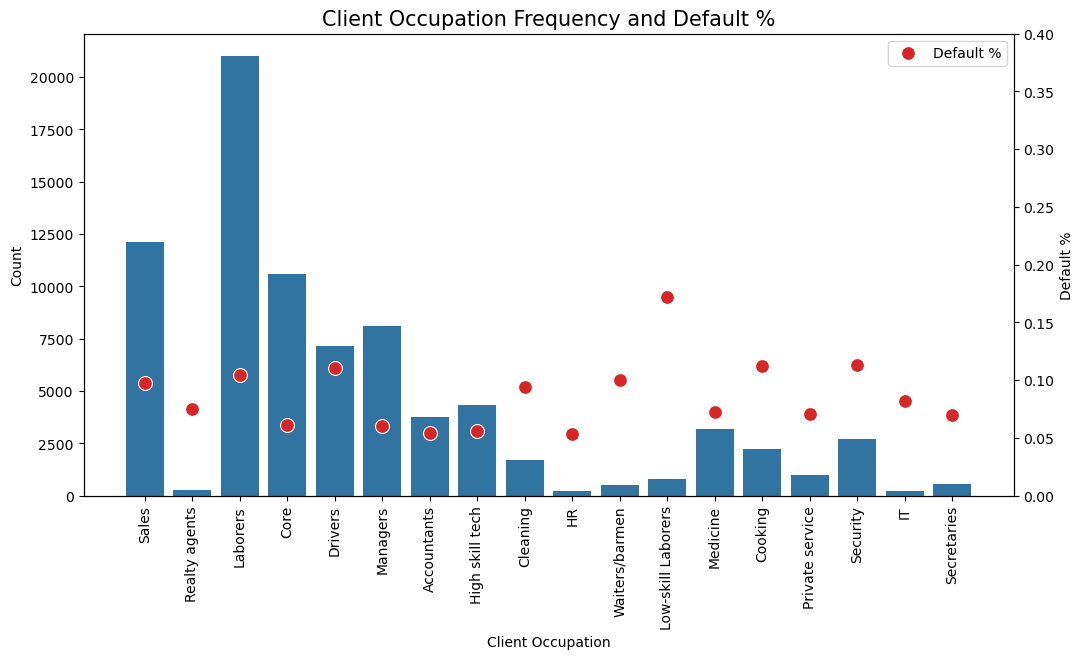

In [15]:
combo_chart('Client_Occupation',nbfi, None)

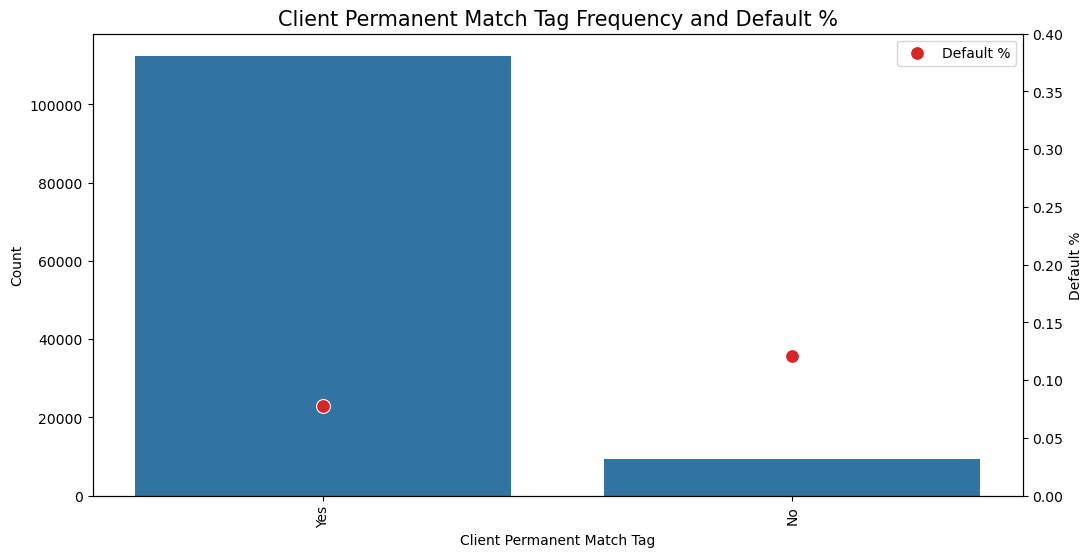

In [16]:
combo_chart('Client_Permanent_Match_Tag',nbfi, None)

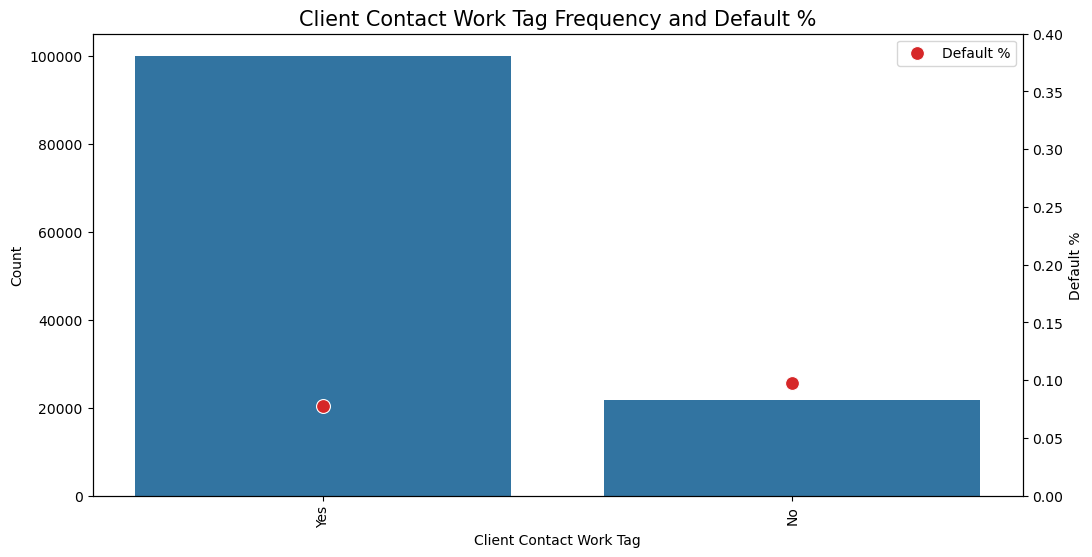

In [18]:
combo_chart('Client_Contact_Work_Tag',nbfi, None)

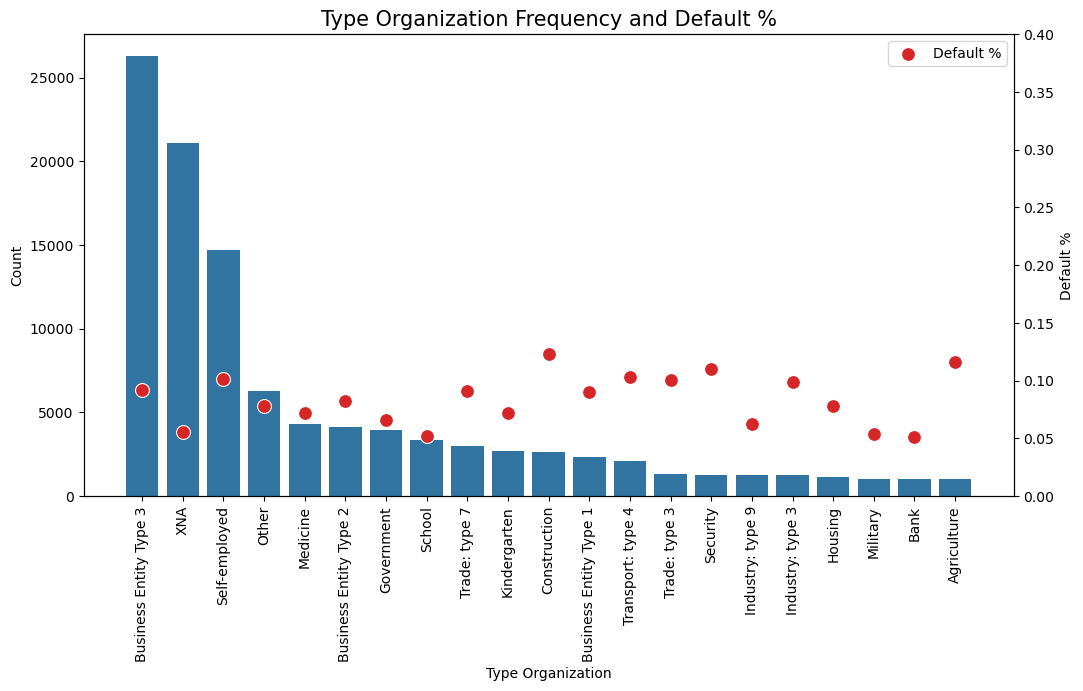

In [19]:
to_order = ['Business Entity Type 3', 'XNA', 'Self-employed', 'Other', 'Medicine', 'Business Entity Type 2', 'Government', 'School', 'Trade: type 7', 'Kindergarten', 'Construction', 'Business Entity Type 1', 'Transport: type 4', 'Trade: type 3', 'Security', 'Industry: type 9', 'Industry: type 3', 'Housing', 'Military', 'Bank', 'Agriculture']
combo_chart('Type_Organization',nbfi, to_order)

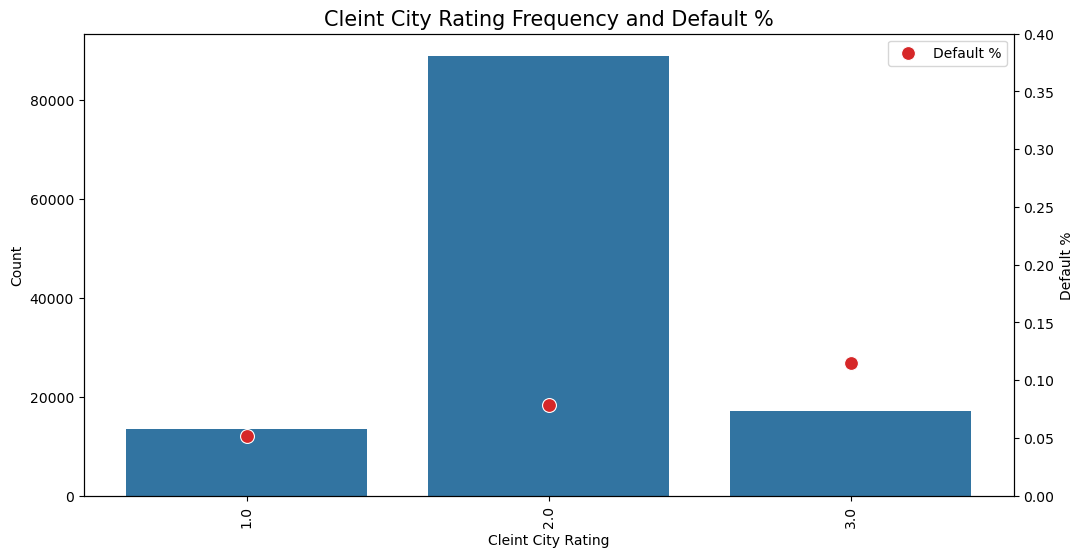

In [20]:
ccr = ['1.0', '2.0', '3.0']
combo_chart('Cleint_City_Rating',nbfi, ccr)

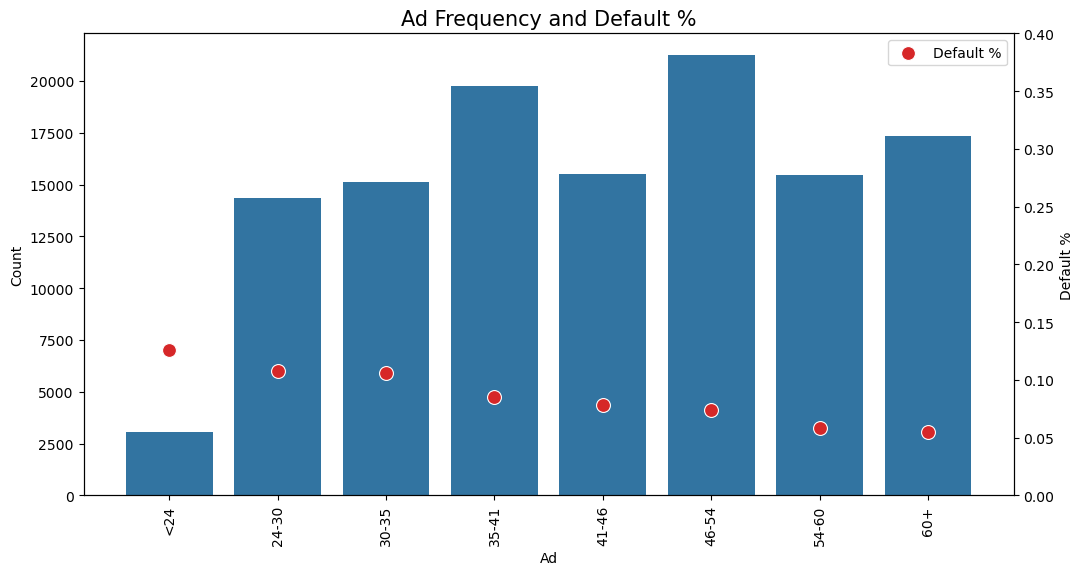

In [21]:
ad_order = ['<24', '24-30', '30-35', '35-41', '41-46', '46-54', '54-60', '60+']
combo_chart('ad',nbfi, ad_order)

Multiple variables stand out in the demographic group based on the combo charts:First is the quantity of variables in 
type organization.  We have a total of 10 subvariables alone within that meet the criterea.  Second, 6subvariables
meet the criterea within client occupation.The lower education levels of junior secondary and secondary education each
meet the critera as well as if the work/home address do not match. Ages 35 or less meet the critera as well.  Lastly, the 
highest city rating, 3.0, met the criterea.

# Financial group

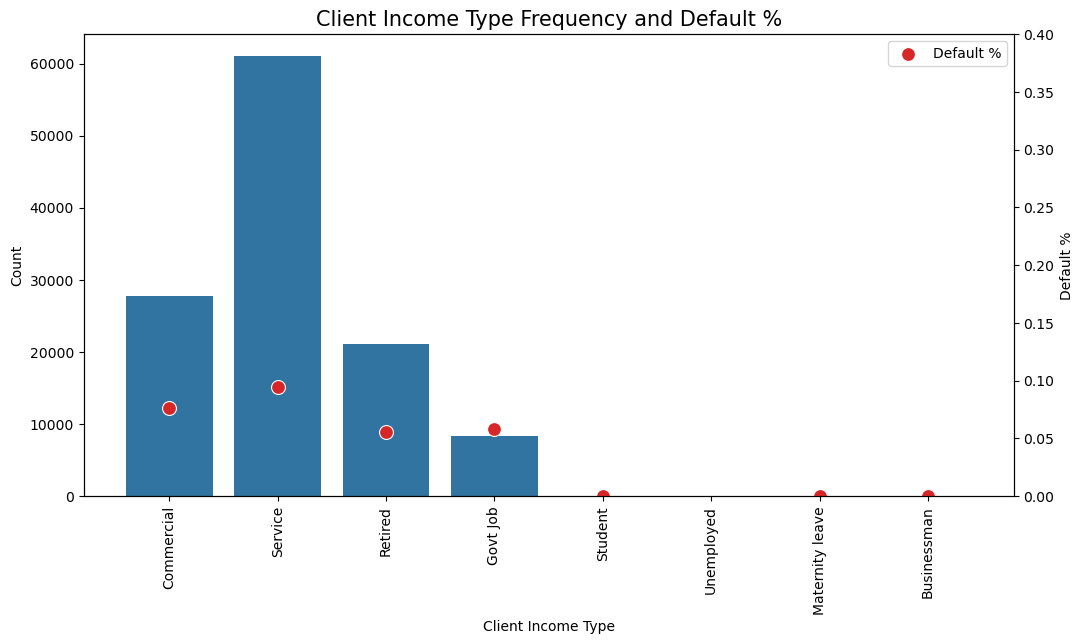

In [22]:
combo_chart('Client_Income_Type',nbfi, None)

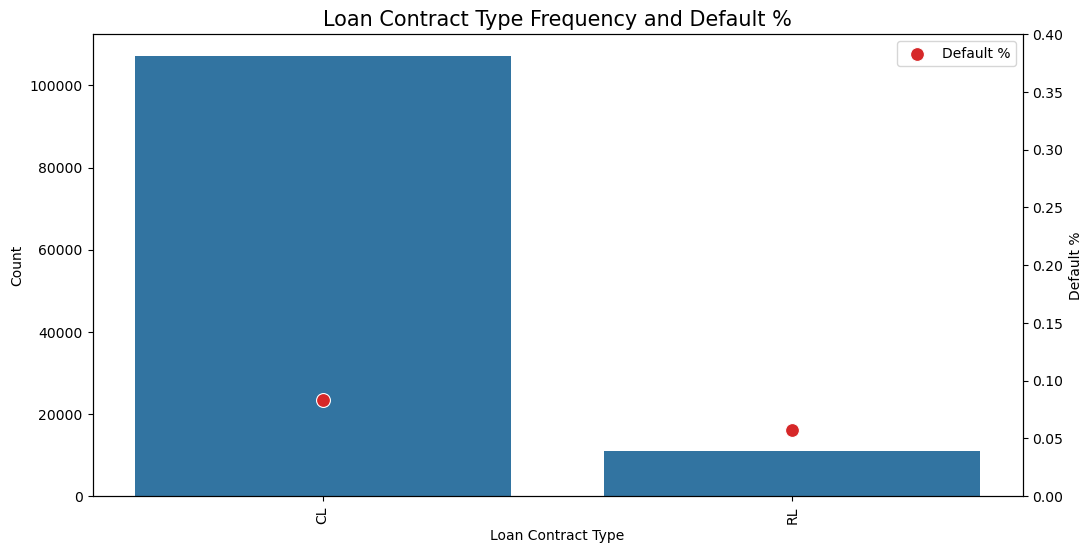

In [23]:
combo_chart('Loan_Contract_Type',nbfi, None)

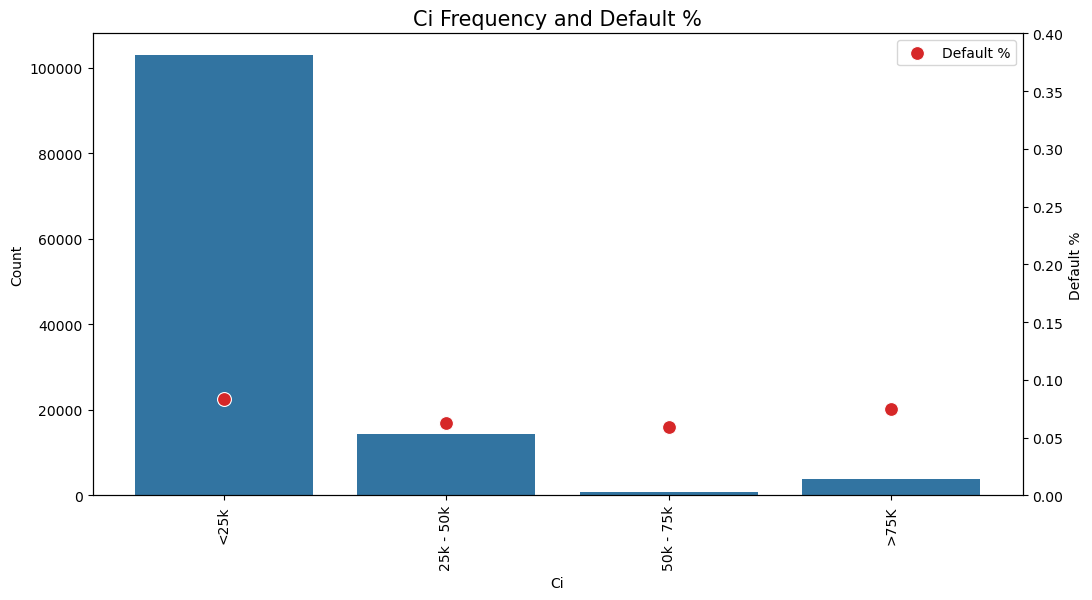

In [24]:
combo_chart('ci',nbfi, None)

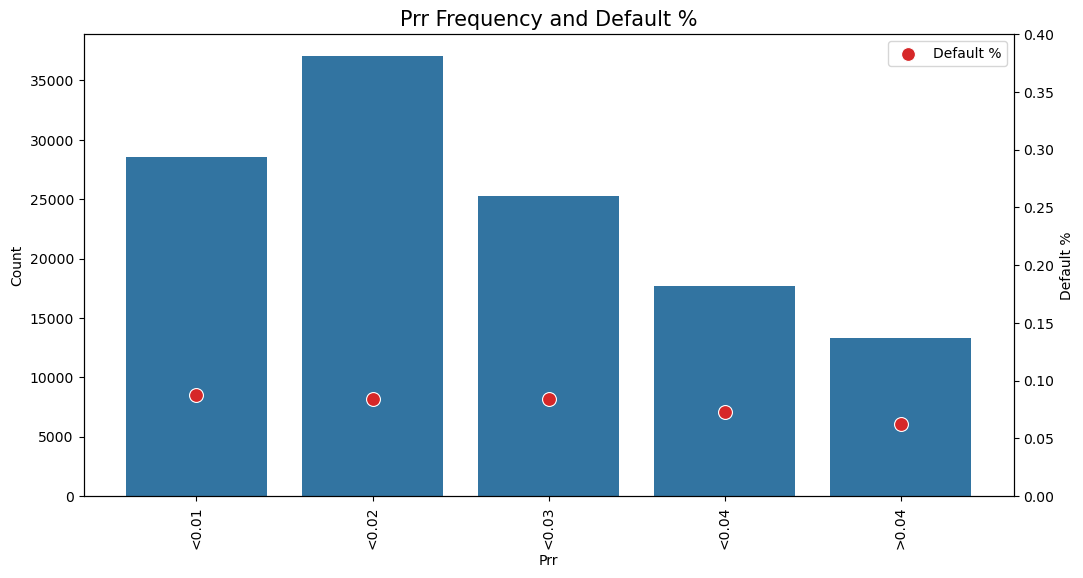

In [25]:
prro = ['<0.01', '<0.02', '<0.03', '<0.04', '>0.04']
combo_chart('prr',nbfi, prro)

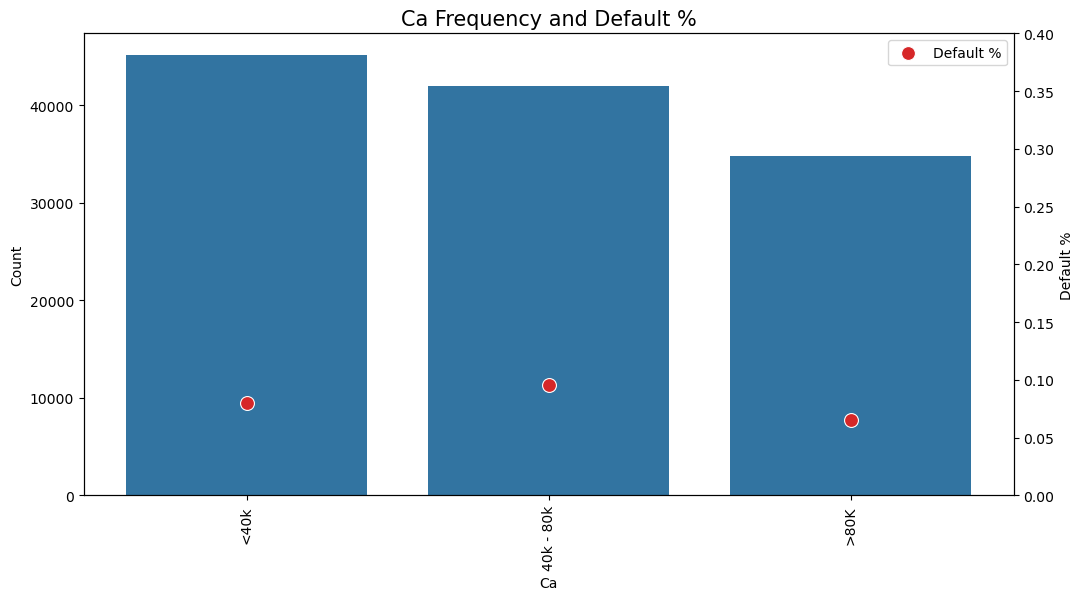

In [88]:
ca_order = ['<40k', '40k - 80k', '>80K']
combo_chart('ca',nbfi, ca_order)

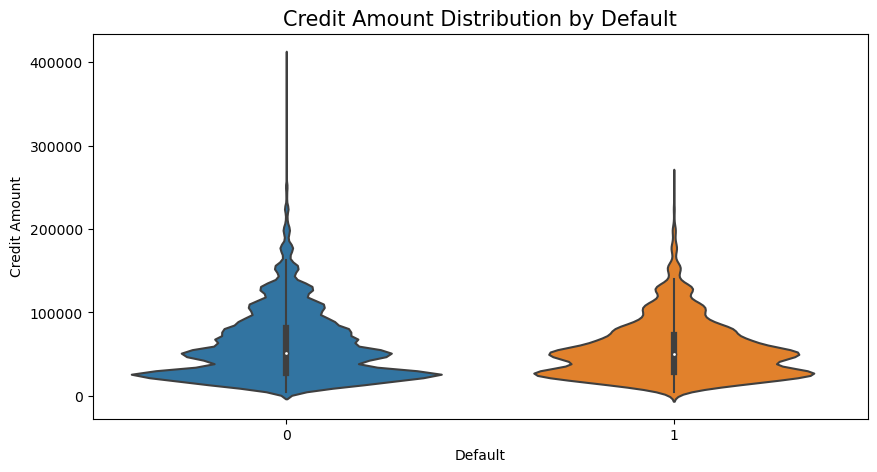

In [31]:
violinplot_default('Default', 'Credit_Amount', nbfi)

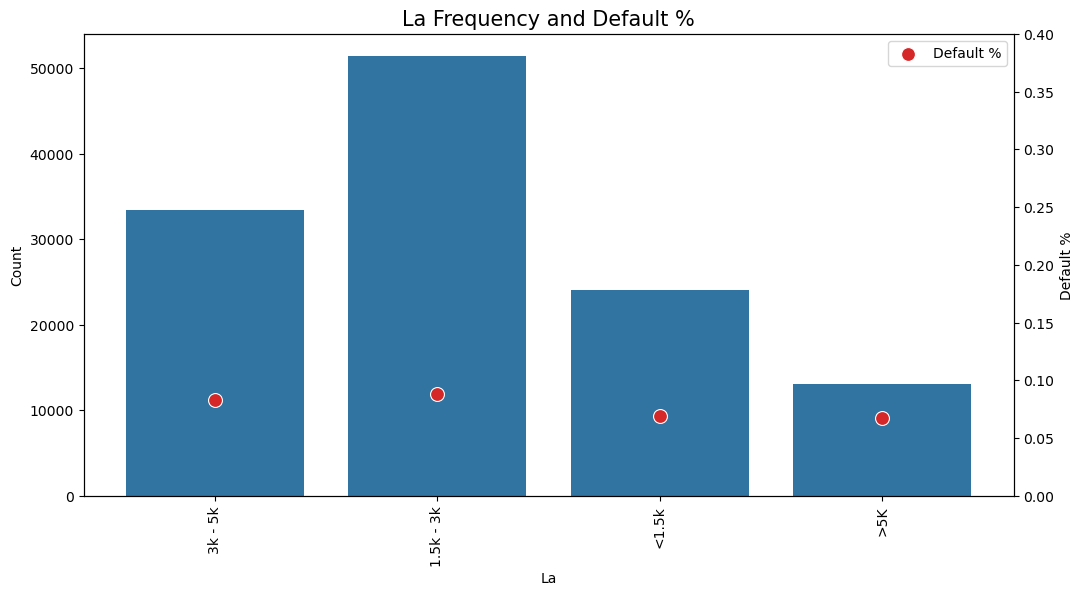

In [17]:
combo_chart('la',nbfi, None)

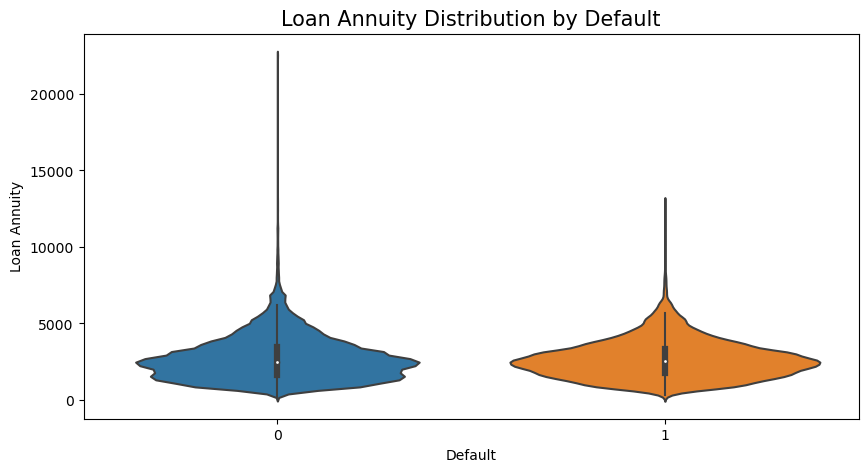

In [27]:
violinplot_default('Default', 'Loan_Annuity', nbfi)

The financial group surpsingly has only two variables that meets the criteria; credit amount 40k - 80k, and 
client income type - service. We will take a closer look at which clients fall into this criterea to reduce loan defaults 
and/or increase monthly profits.

# Application group

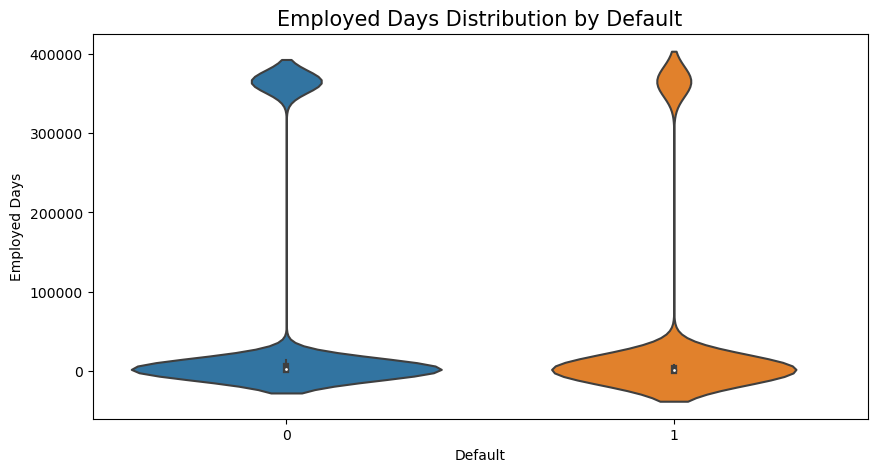

In [33]:
violinplot_default('Default', 'Employed_Days', nbfi)

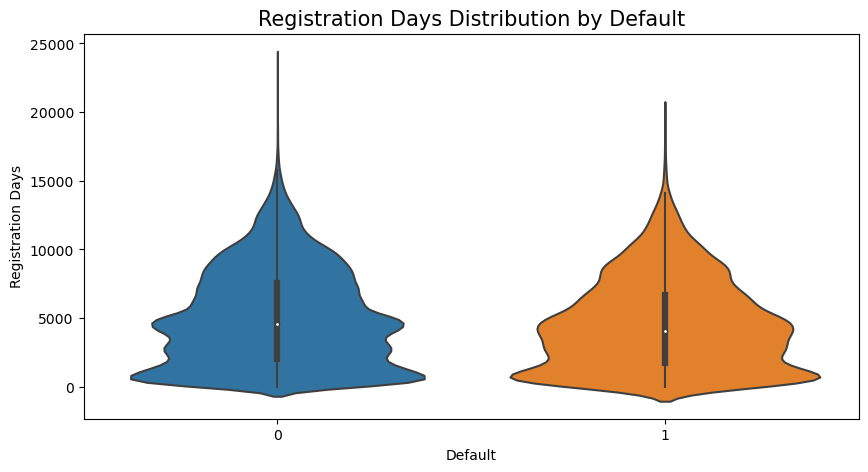

In [34]:
violinplot_default('Default', 'Registration_Days', nbfi)

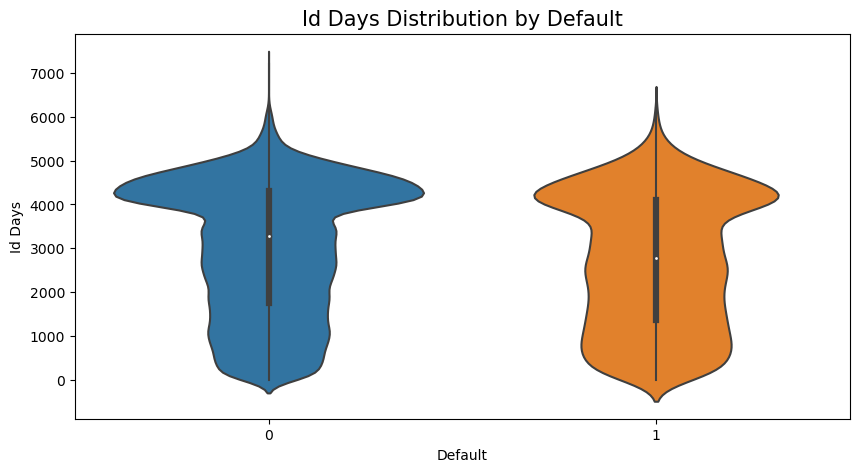

In [35]:
violinplot_default('Default', 'ID_Days', nbfi)

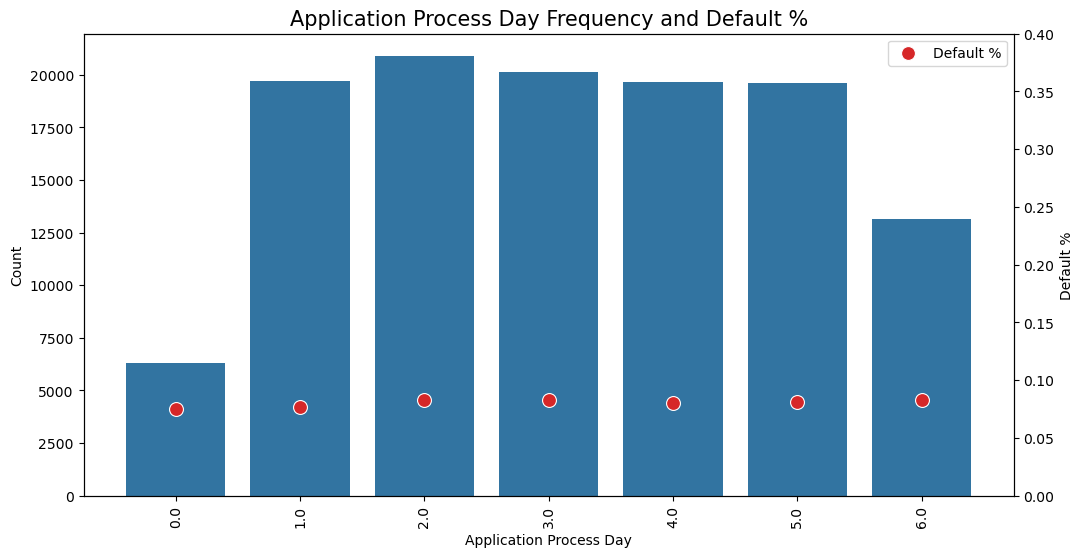

In [120]:
apd = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0']
combo_chart('Application_Process_Day',nbfi, apd)

In the application group, 0 variables meet the criteria.  Therefore, this group will be discarded.

# Personal group

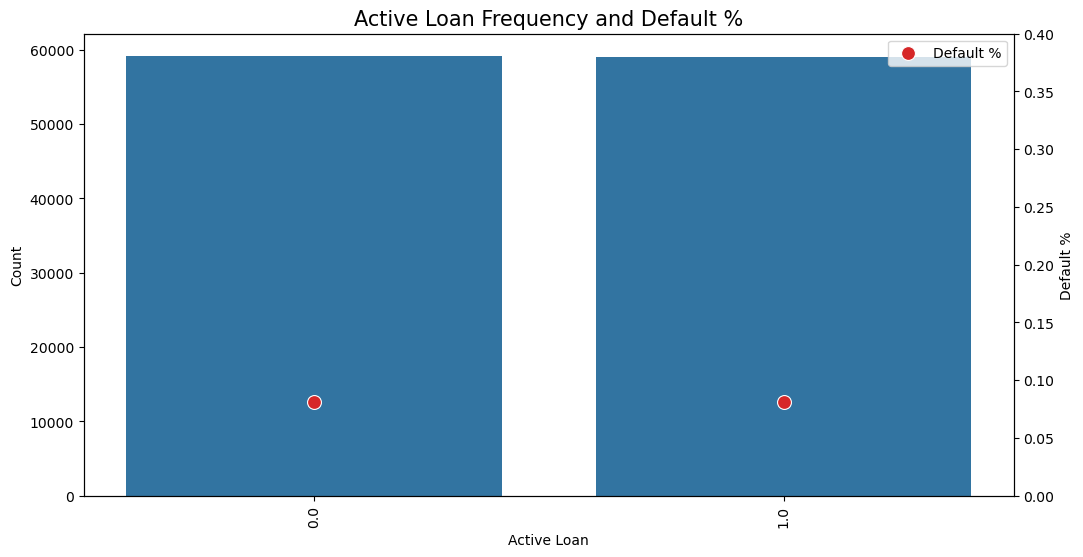

In [26]:
combo_chart('Active_Loan', nbfi, None)

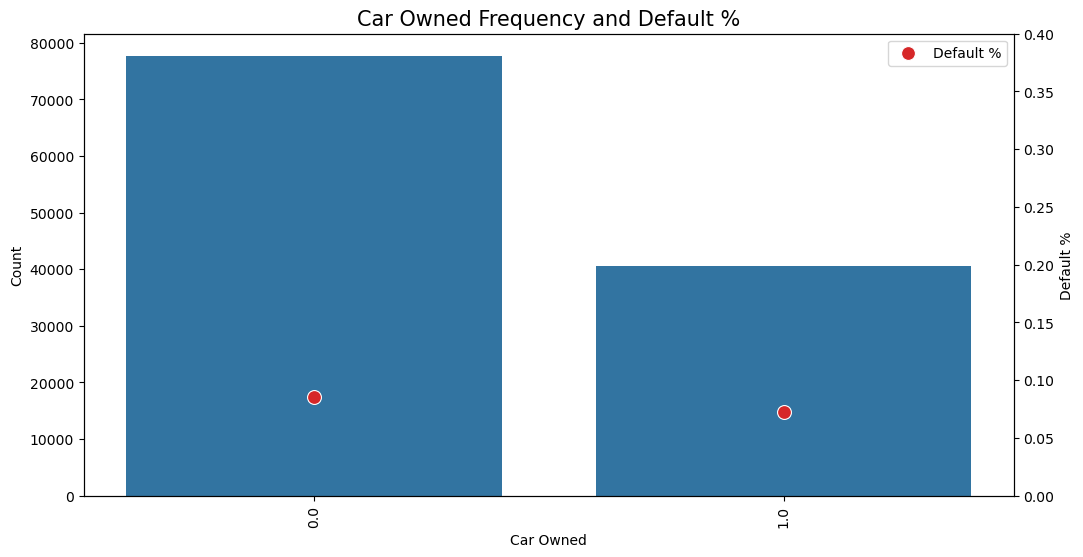

In [27]:
combo_chart('Car_Owned', nbfi, None)

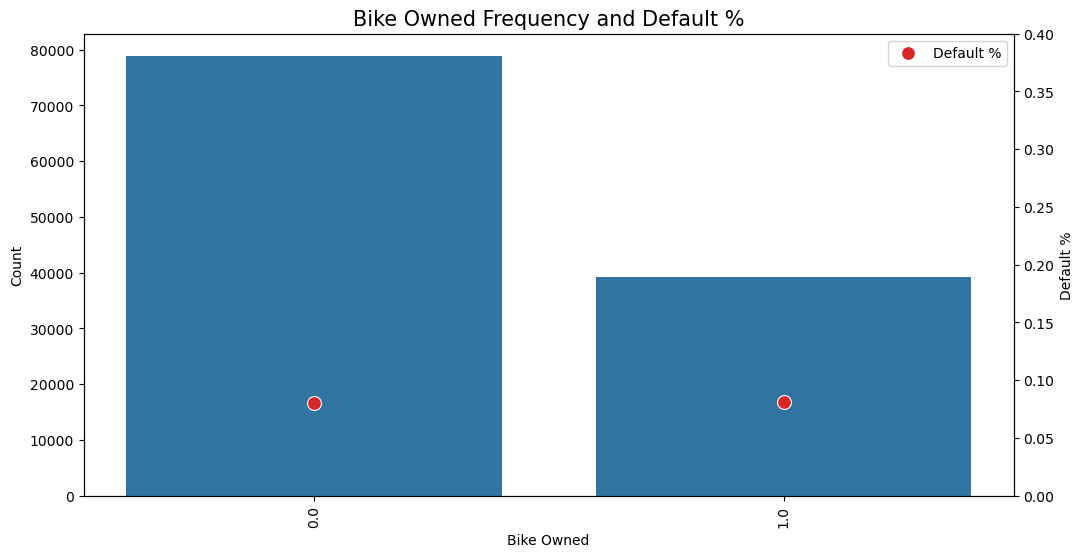

In [28]:
combo_chart('Bike_Owned', nbfi, None)

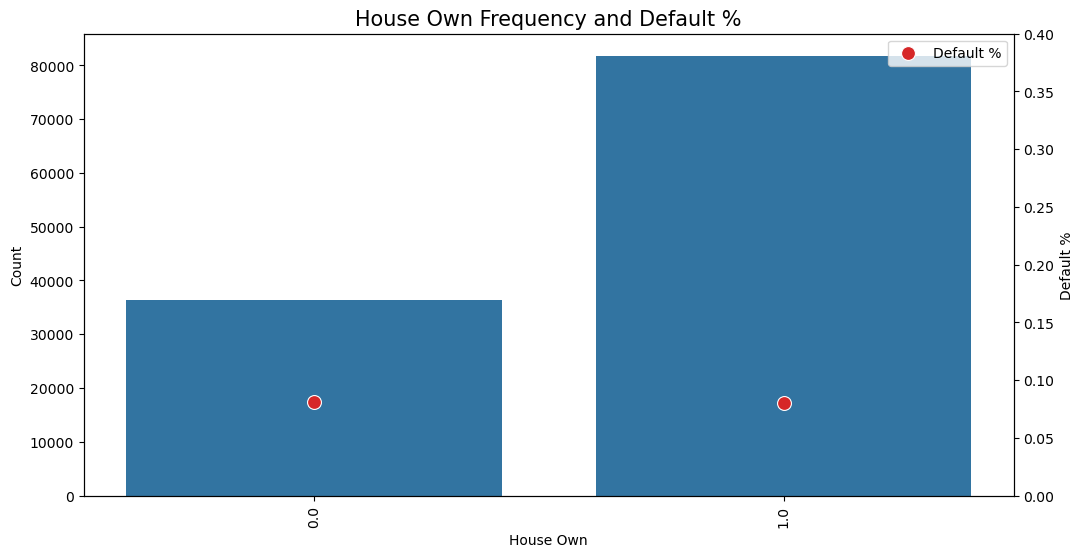

In [29]:
combo_chart('House_Own', nbfi, None)

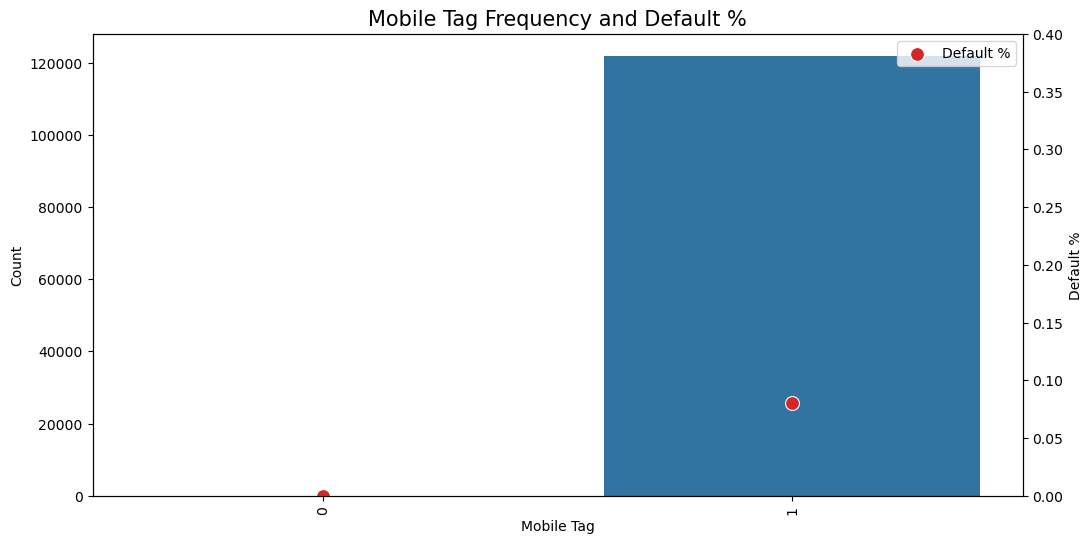

In [30]:
combo_chart('Mobile_Tag', nbfi, None)

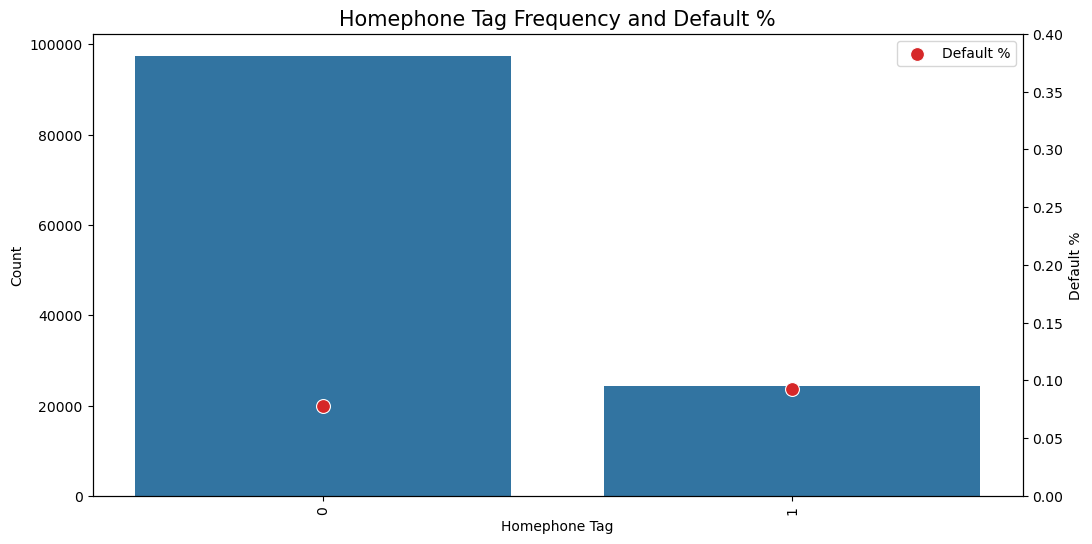

In [31]:
combo_chart('Homephone_Tag', nbfi, None)

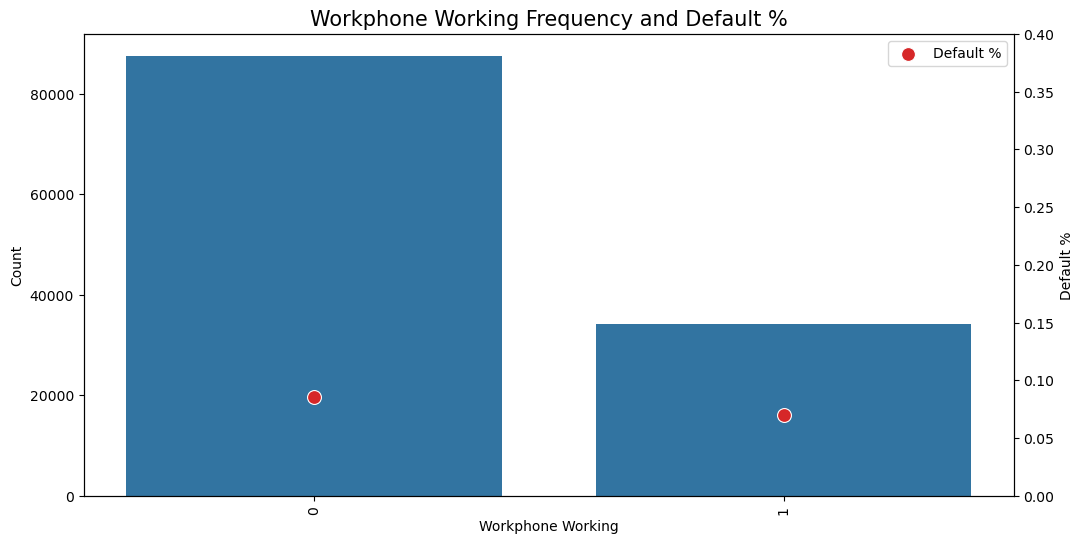

In [32]:
combo_chart('Workphone_Working', nbfi, None)

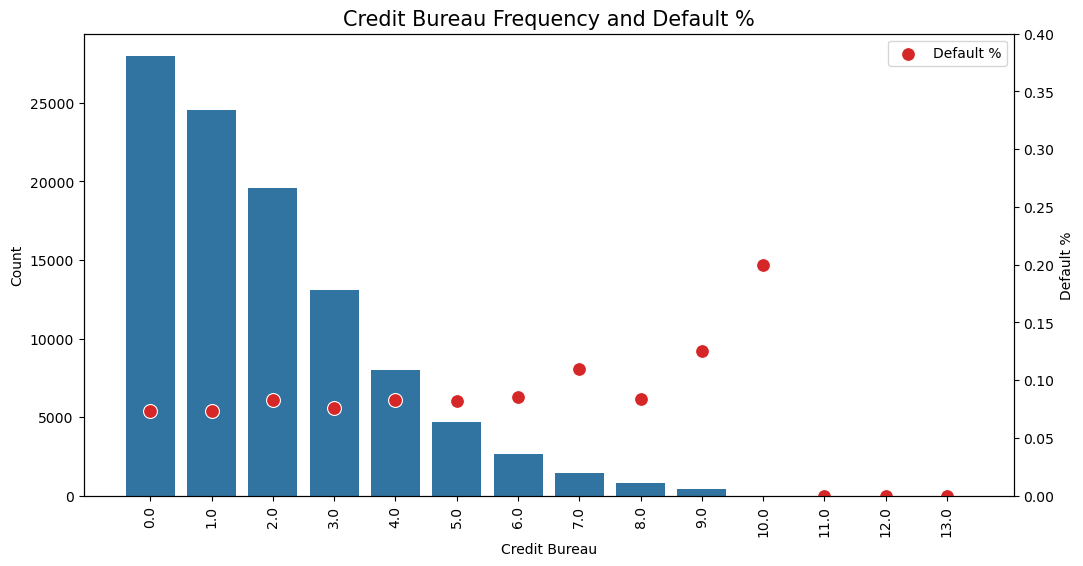

In [33]:
cc = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0']
combo_chart('Credit_Bureau', nbfi, cc)

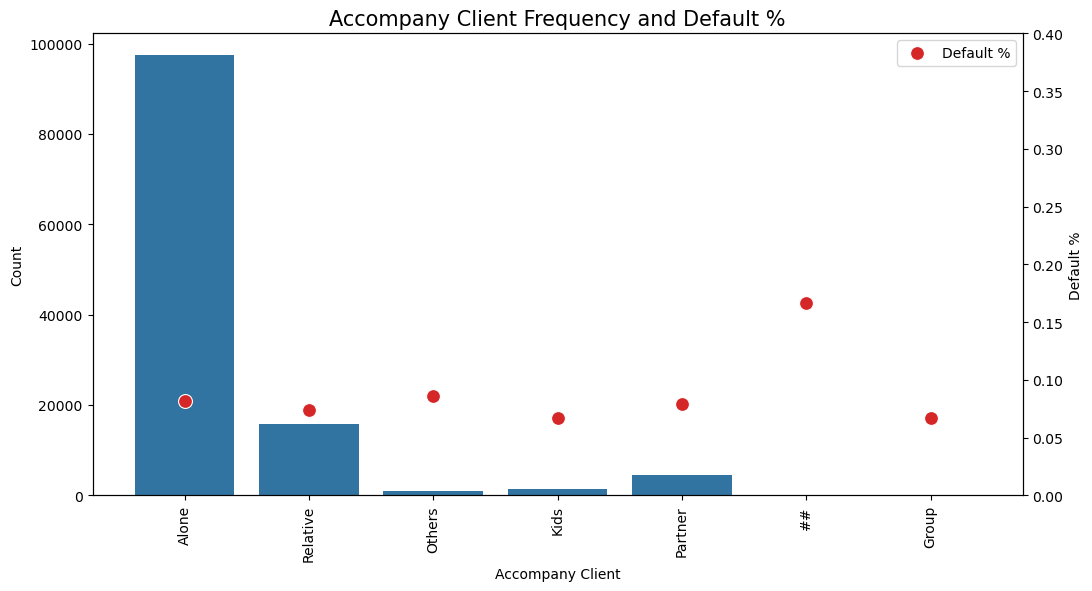

In [34]:
combo_chart('Accompany_Client', nbfi,None)

0 varables in the personal group meet the criterea.  Credit bureau was considered, however, the bulk of the data within the 
group does not meet, 0.0 - 5.0. 7.0 appears to meet the 9% mark but the count does not.  In social circle default,
several outliers occur and the variable was discarded. Each client filled out mobile number, and is the only variable to 
have 0 null values.  

# Score Source Group

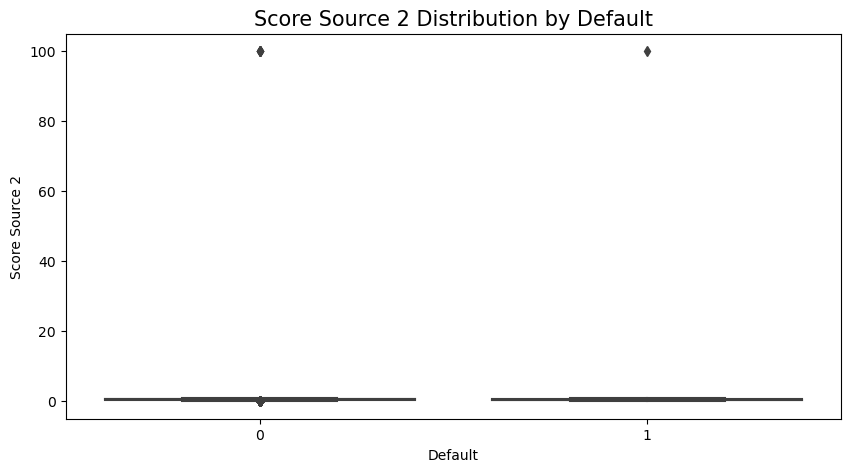

In [29]:
boxplot_default('Default','Score_Source_2', nbfi, None)

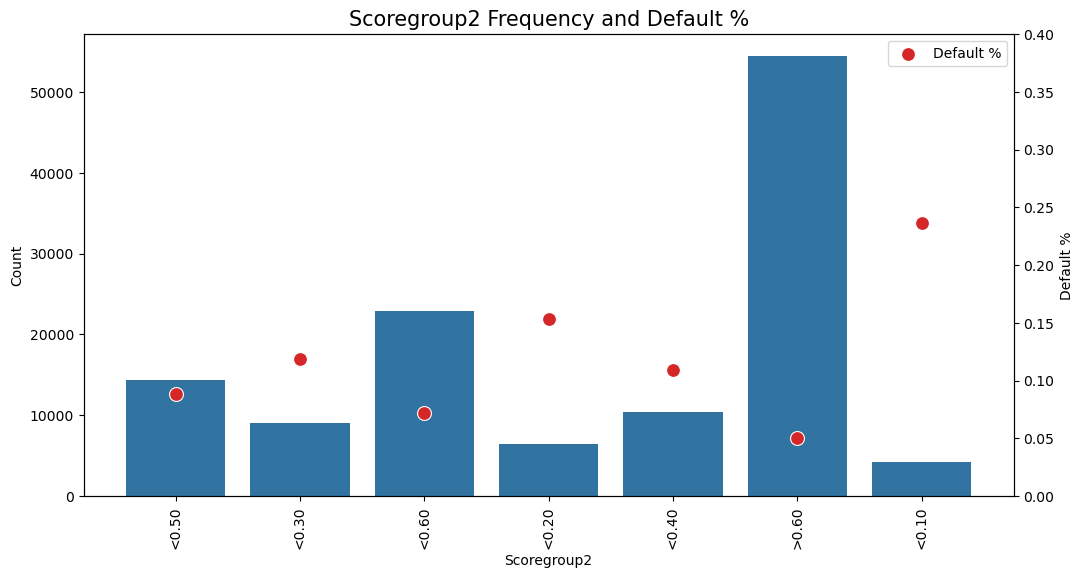

In [52]:
combo_chart('scoregroup2', nbfi,None)

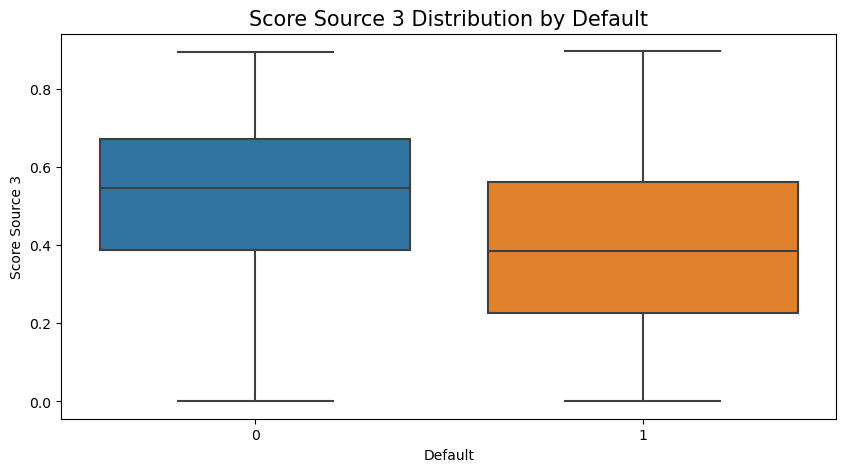

In [30]:
boxplot_default('Default','Score_Source_3', nbfi, None)

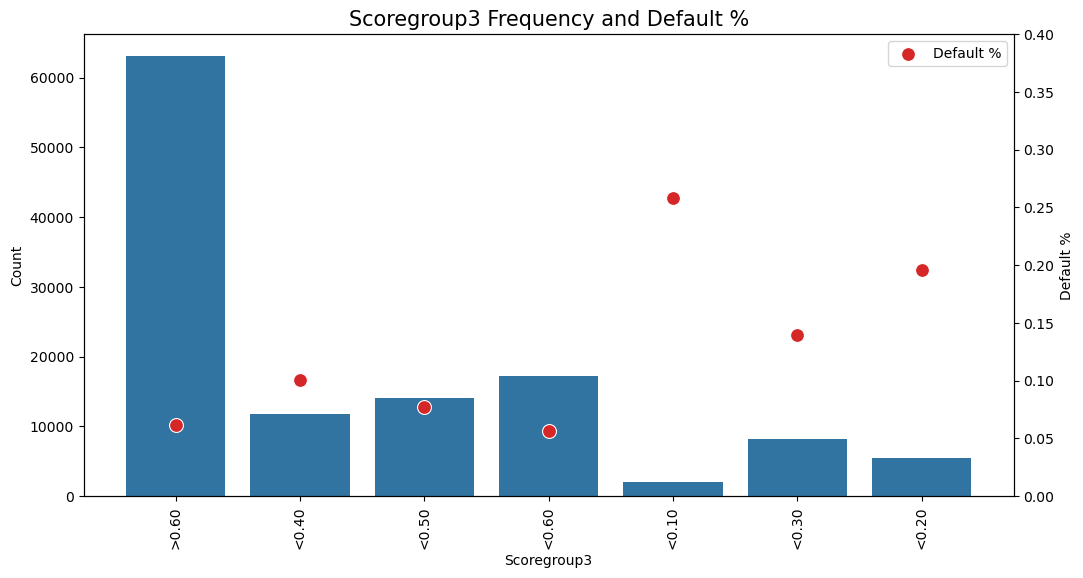

In [51]:
combo_chart('scoregroup3', nbfi,None)

Score source 2 and 3 appears to have a significant impact on the default rate. Score source 2 and 3 have a very high count
and high default rate.  This metric appears to have a significant impact compared to the other variables. Score source 3 
has very even distribution compared score source 2.  Score source 2 has outiers that impact the over quartiles.

# Key variables

In [15]:
# Type_Organization top variables
filtered_to = ((nbfi['Type_Organization'] == 'Business Entity Type 3') |
               (nbfi['Type_Organization'] == 'Self-employed') |
               (nbfi['Type_Organization'] == 'Trade: type 7') |
               (nbfi['Type_Organization'] == 'Construction') |
               (nbfi['Type_Organization'] == 'Business Entity Type 1') |
               (nbfi['Type_Organization'] == 'Transport: type 4') |
               (nbfi['Type_Organization'] == 'Trade: type 3') |
               (nbfi['Type_Organization'] == 'Security') |
               (nbfi['Type_Organization'] == 'Industry: type 3') |
               (nbfi['Type_Organization'] == 'Agriculture'))
filtered_to2 = nbfi.loc[filtered_to, 'Type_Organization']

In [16]:
# Client_Education top variables
filtered_ce = ((nbfi['Client_Education'] == 'Junior secondary') |
               (nbfi['Client_Education'] == 'Secondary'))
filtered_ce2 = nbfi.loc[filtered_ce, 'Client_Education']

In [17]:
# Client_Occupation top variables
filtered_co = ((nbfi['Client_Occupation'] == 'Cleaning') |
               (nbfi['Client_Occupation'] == 'Cooking') |
               (nbfi['Client_Occupation'] == 'Drivers') |
               (nbfi['Client_Occupation'] == 'Laborers') |
               (nbfi['Client_Occupation'] == 'Sales') |
               (nbfi['Client_Occupation'] == 'Security'))
filtered_co2 = nbfi.loc[filtered_co, 'Client_Occupation']

In [18]:
# Client_Permanent_Match_Tag
filtered_cpmt = nbfi['Client_Permanent_Match_Tag'] == 'No'
filtered_cpmt2 = nbfi.loc[filtered_cpmt, 'Client_Permanent_Match_Tag']

In [19]:
# Client_Contact_Work_Tag
filtered_ccwt = ((nbfi['Client_Contact_Work_Tag'] == 'No'))
filtered_ccwt2 = nbfi.loc[filtered_ccwt, 'Client_Contact_Work_Tag']

In [20]:
# Cleint_City_Rating
filtered_ccr = ((nbfi['Cleint_City_Rating'] == '3.0'))
filtered_ccr2 = nbfi.loc[filtered_ccr, 'Cleint_City_Rating']

In [21]:
# Client_Income_Type
filtered_cit = ((nbfi['Client_Income_Type'] == 'Service'))
filtered_cit2 = nbfi.loc[filtered_cit, 'Client_Income_Type']

In [22]:
# Age top ages
filtered_age = ((nbfi['ad'] == '<24') |
               (nbfi['ad'] == '24-30') |
               (nbfi['ad'] == '30-35'))
filtered_age2 = nbfi.loc[filtered_age, 'ad']

In [23]:
# Credit_Amount
filtered_ca = (nbfi['ca'] == '40k - 80k')
filtered_ca2 = nbfi.loc[filtered_ca, 'ca']

In [24]:
# Score_Source_2 top variables
filtered_scc2 = ((nbfi['scoregroup2'] == '<0.10') |
               (nbfi['scoregroup2'] == '<0.20') |
               (nbfi['scoregroup2'] == '<0.30') |
               (nbfi['scoregroup2'] == '<0.40') |
               (nbfi['scoregroup2'] == '<0.50'))
filtered_scc22 = nbfi.loc[filtered_scc2, 'scoregroup2']

In [25]:
# Score_Source_3 top variables
filtered_scc3 = ((nbfi['scoregroup3'] == '<0.20') |
               (nbfi['scoregroup3'] == '<0.30') |
               (nbfi['scoregroup3'] == '<0.40'))
filtered_scc33 = nbfi.loc[filtered_scc3, 'scoregroup3']

In [26]:
# heatmap showing multiple variables based on default %
def crosstab(y, x, x_label, y_label):
    fig, ax = plt.subplots(figsize=(10, 4))

    default_ct = pd.crosstab(y, x, values=nbfi['Default'], aggfunc='mean').round(2)

    sns.heatmap(default_ct, linewidths=.1, annot=True, ax=ax)

    plt.xlabel(x_label, size=10)
    plt.ylabel(y_label, size=10)
    plt.title(f'{x_label} vs. {y_label}', size=15)
    plt.show()

# Type Organization Variable

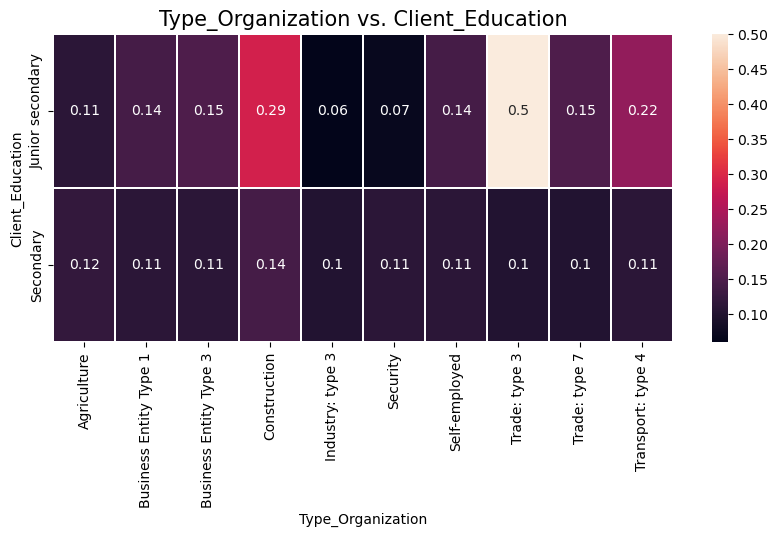

In [44]:
#Type_Organization vs. Client_Education
crosstab(filtered_ce2, filtered_to2, 'Type_Organization', 'Client_Education')

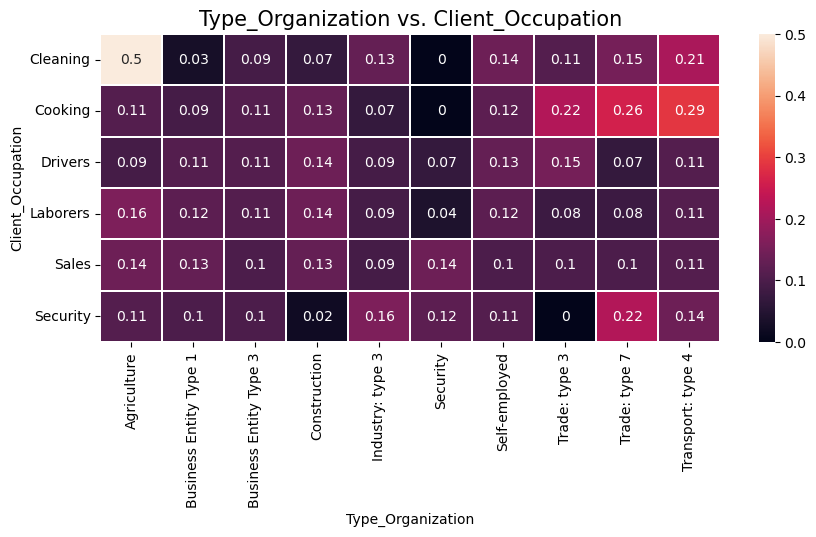

In [98]:
# Type_Organization vs. Client_Occupation
crosstab(filtered_co2, filtered_to2, 'Type_Organization', 'Client_Occupation')

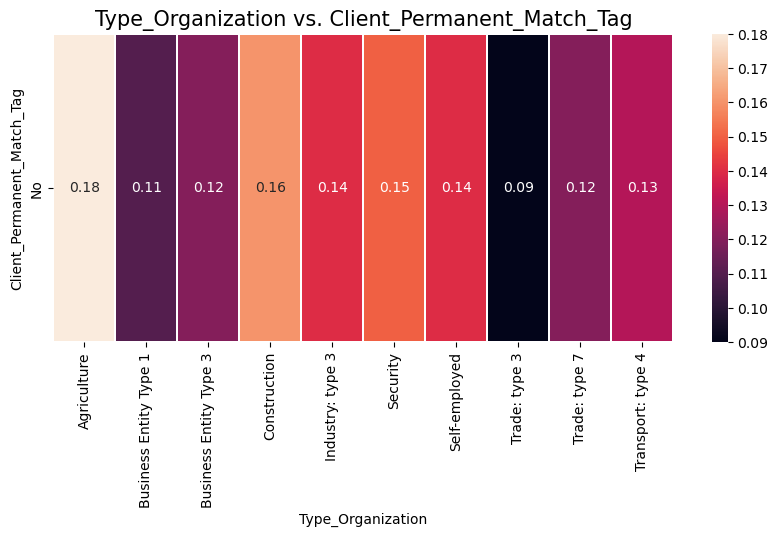

In [99]:
# Type_Organization vs.Client_Permanent_Match_Tag
crosstab(filtered_cpmt2, filtered_to2, 'Type_Organization', 'Client_Permanent_Match_Tag')

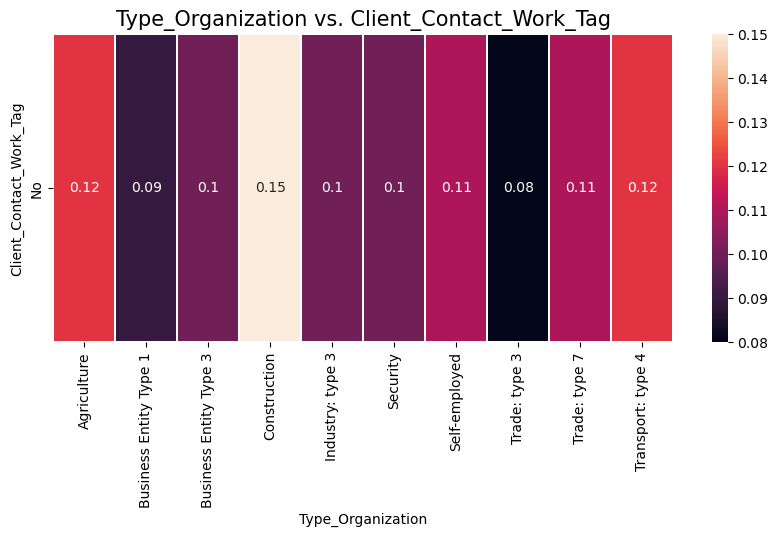

In [100]:
# Type_Organization vs. Client_Contact_Work_Tag
crosstab(filtered_ccwt2, filtered_to2, 'Type_Organization', 'Client_Contact_Work_Tag')

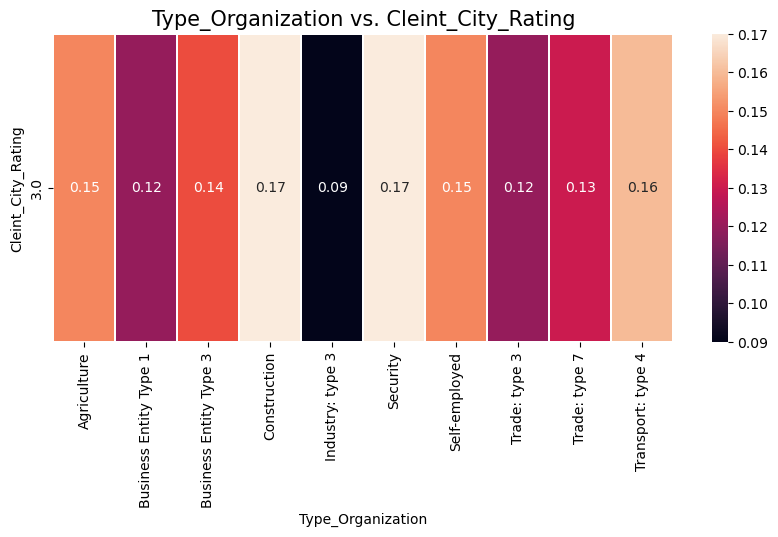

In [101]:
# Type_Organization vs. Cleint_City_Rating
crosstab(filtered_ccr2, filtered_to2, 'Type_Organization', 'Cleint_City_Rating')

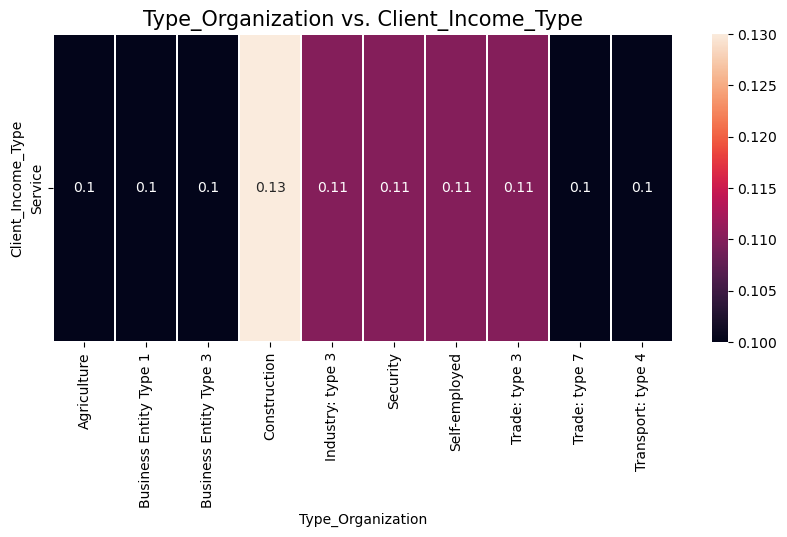

In [102]:
# Type_Organization vs. Client_Income_Type
crosstab(filtered_cit2, filtered_to2, 'Type_Organization', 'Client_Income_Type')

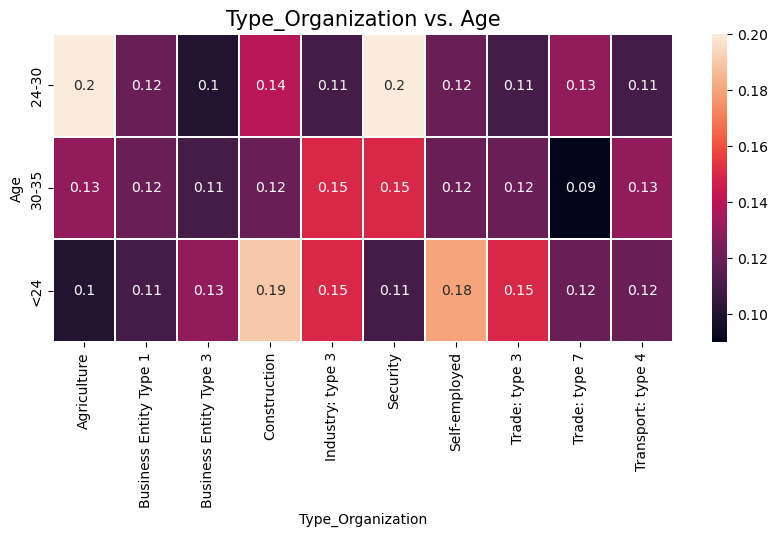

In [103]:
# Type_Organization vs. Age
crosstab(filtered_age2, filtered_to2, 'Type_Organization', 'Age')

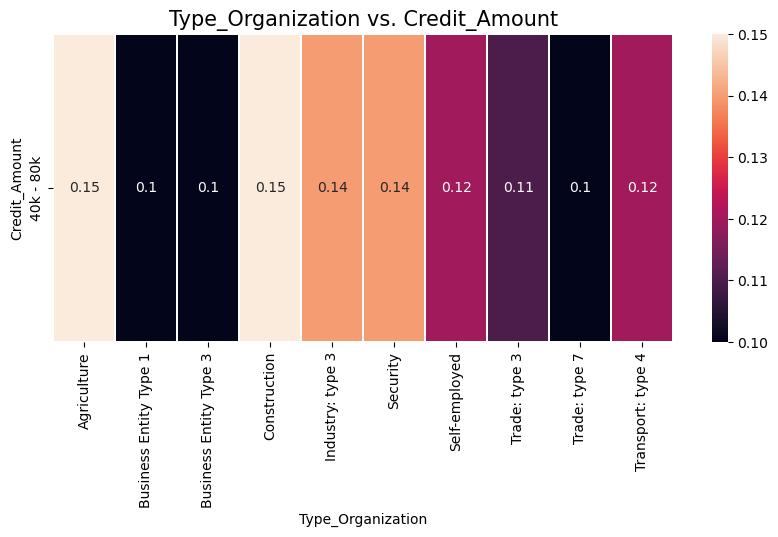

In [104]:
# Type_Organization vs. Credit_Amount
crosstab(filtered_ca2, filtered_to2, 'Type_Organization', 'Credit_Amount')

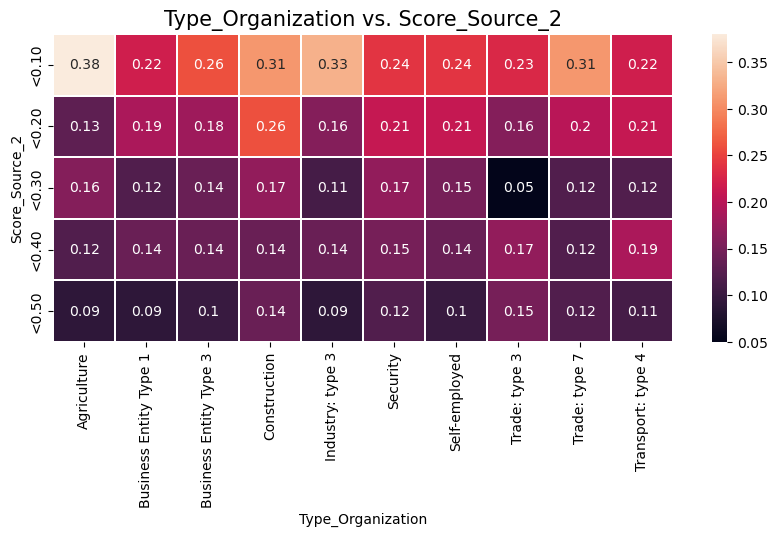

In [60]:
# Type_Organization vs. Score_Source_2
crosstab(filtered_scc22, filtered_to2, 'Type_Organization', 'Score_Source_2')

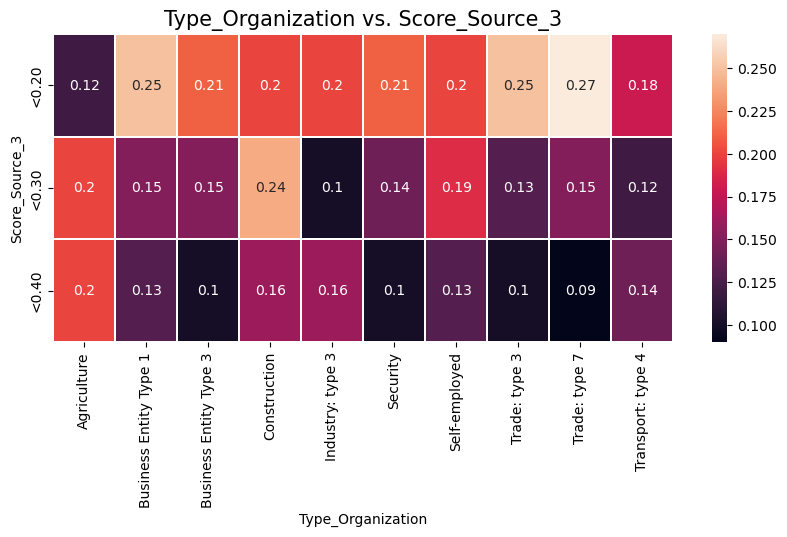

In [69]:
# Type_Organization vs. Score_Source_3
crosstab(filtered_scc33, filtered_to2, 'Type_Organization', 'Score_Source_3')

The type of organization refers to the industry in which the client/applicant employer operates. Type Organization has a very signicant relationship with the overall default rate.  Several variables appear to have a minium impact being in the vs Occupation category.  However, the bulk of the relation has a default rate greater that 9-10% across all variables. Specifically within score source 2 and 3. 

# Client Education Variable

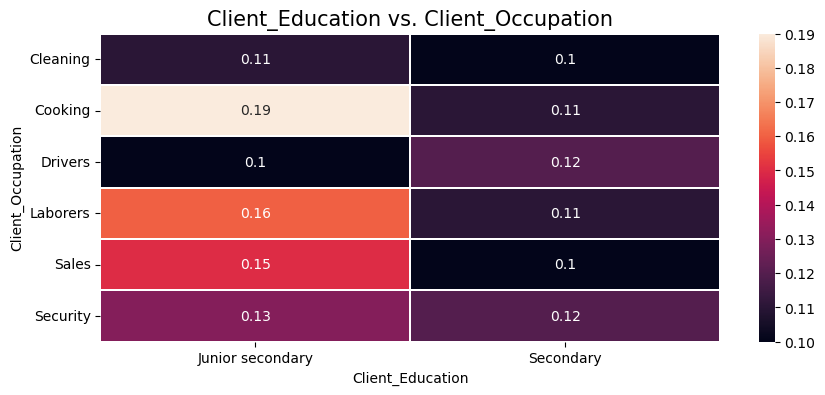

In [105]:
# Client_Education vs. Client_Occupation
crosstab(filtered_co2, filtered_ce2, 'Client_Education', 'Client_Occupation')

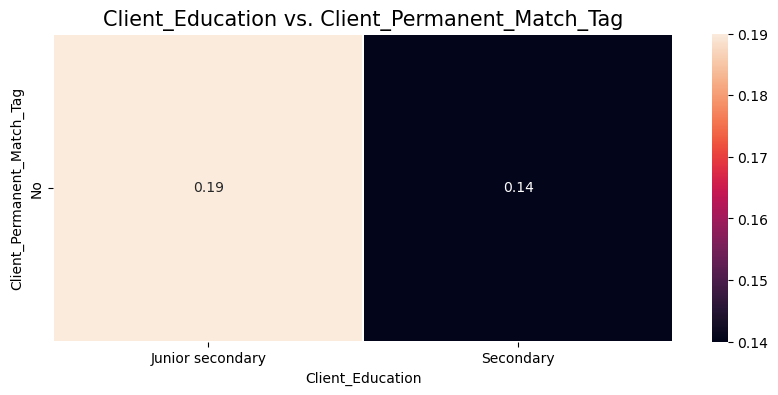

In [106]:
# Client_Education vs. Client_Permanent_Match_Tag
crosstab(filtered_cpmt2, filtered_ce2, 'Client_Education', 'Client_Permanent_Match_Tag')

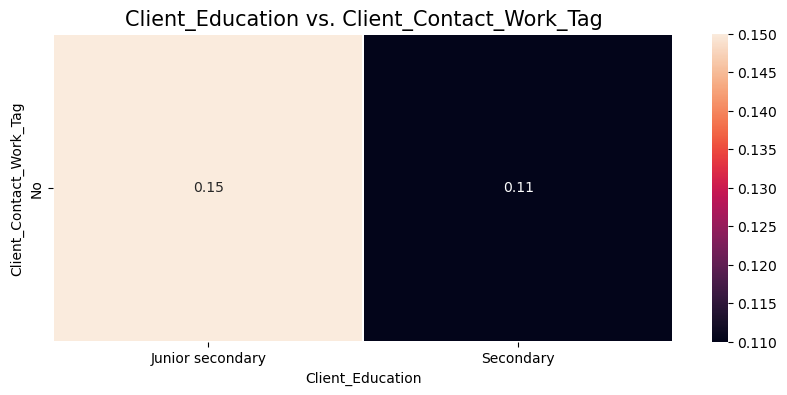

In [97]:
# Client_Education vs. Client_Contact_Work_Tag
crosstab(filtered_ccwt2, filtered_ce2, 'Client_Education', 'Client_Contact_Work_Tag')

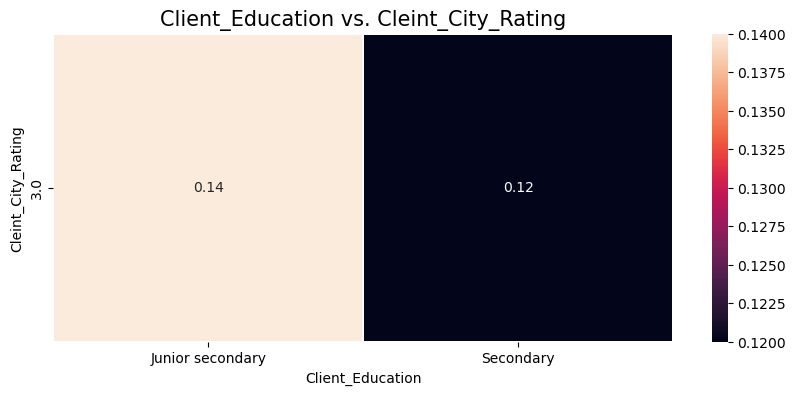

In [107]:
# Client_Education vs. Cleint_City_Rating
crosstab(filtered_ccr2, filtered_ce2, 'Client_Education', 'Cleint_City_Rating')

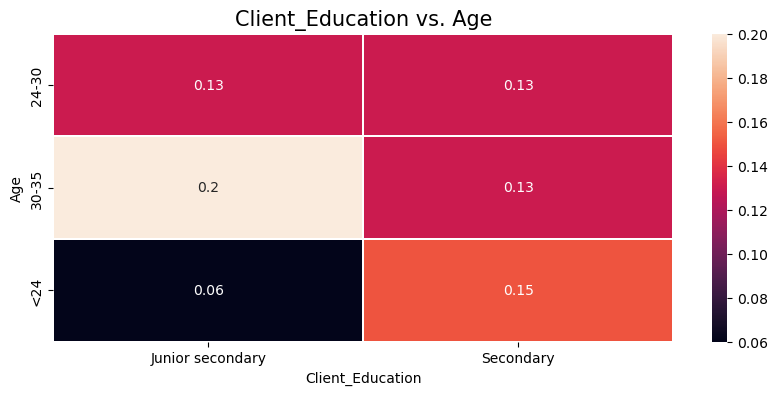

In [108]:
# Client_Education vs. Age
crosstab(filtered_age2, filtered_ce2, 'Client_Education', 'Age')

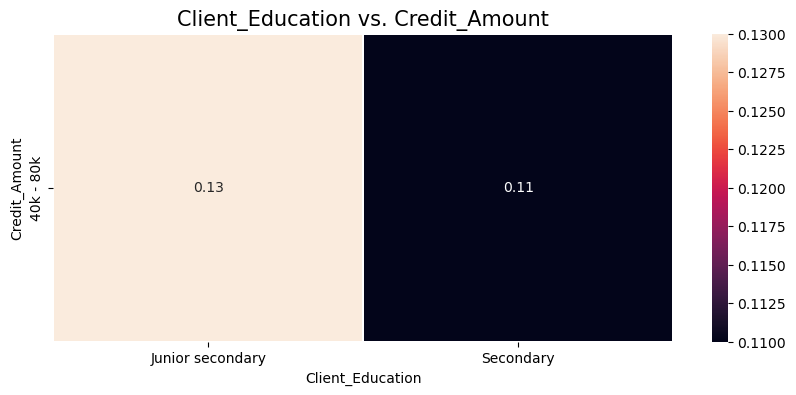

In [109]:
# Client_Education vs. Credit_Amount
crosstab(filtered_ca2, filtered_ce2, 'Client_Education', 'Credit_Amount')

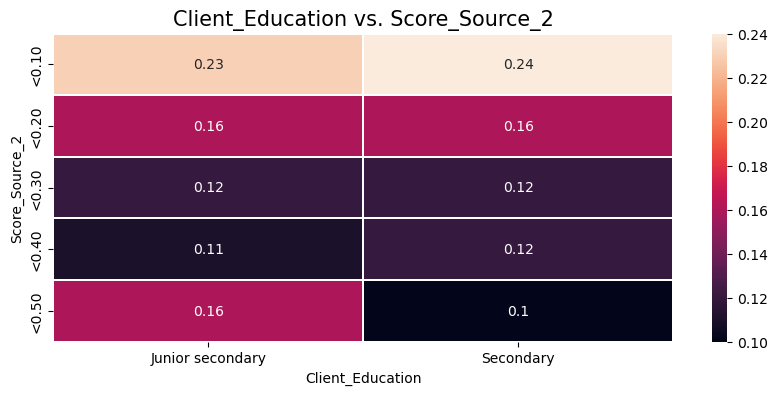

In [62]:
# Client_Education vs. Score_Source_2
crosstab(filtered_scc22, filtered_ce2, 'Client_Education', 'Score_Source_2')

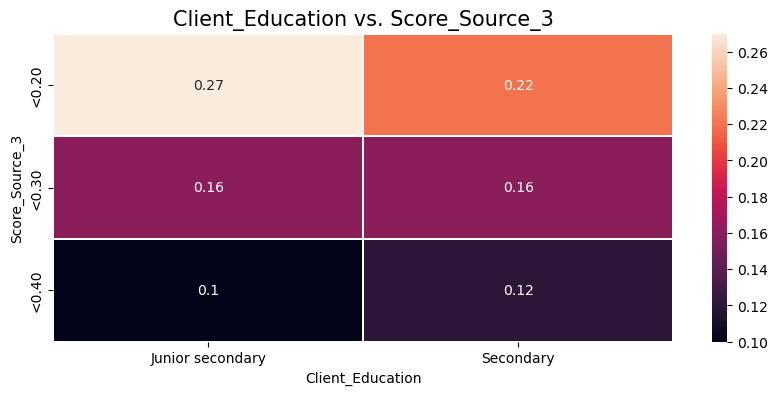

In [63]:
# Client_Education vs. Score_Source_3
crosstab(filtered_scc33, filtered_ce2, 'Client_Education', 'Score_Source_3')

This variable is based on the highest level of education the client has achieved. Client education has a significant imapct with the default rate.  Each variable is consistently above 10% with the exception of junior secondary vs age <24.  Lower education often leads to low job stability, and low income which often results in a higher default rate.  The greatest impact is within score source 2 and 3; <.10 and <.20 respectively.

# Client Occupation Variable

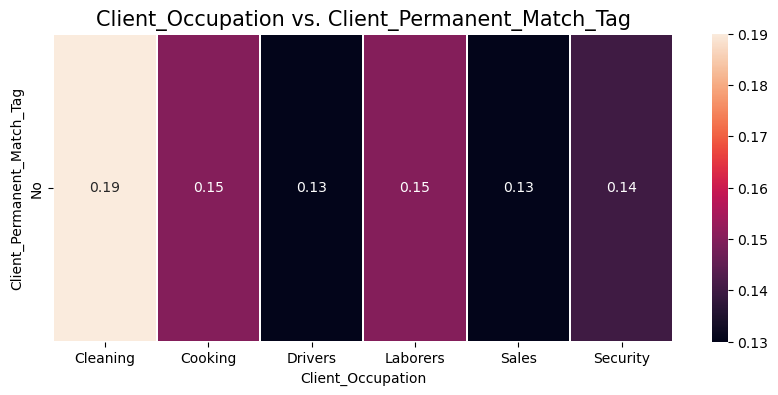

In [110]:
# Client_Occupation vs. Client_Permanent_Match_Tag
crosstab(filtered_cpmt2, filtered_co2, 'Client_Occupation', 'Client_Permanent_Match_Tag')

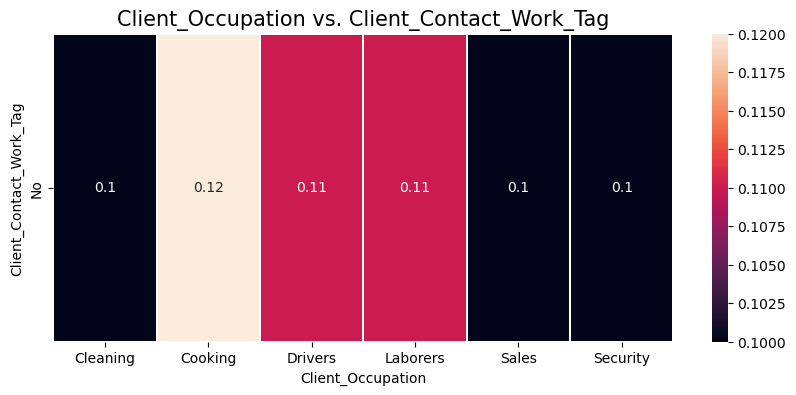

In [111]:
# Client_Occupation vs. Client_Contact_Work_Tag
crosstab(filtered_ccwt2, filtered_co2, 'Client_Occupation', 'Client_Contact_Work_Tag')

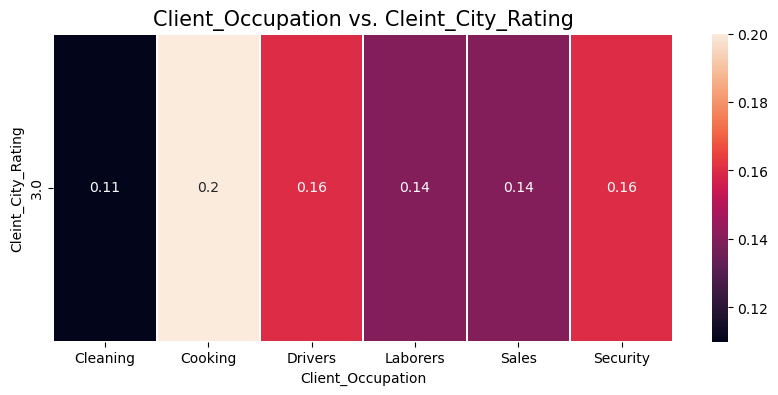

In [112]:
# Client_Occupation vs. Cleint_City_Rating
crosstab(filtered_ccr2, filtered_co2, 'Client_Occupation', 'Cleint_City_Rating')

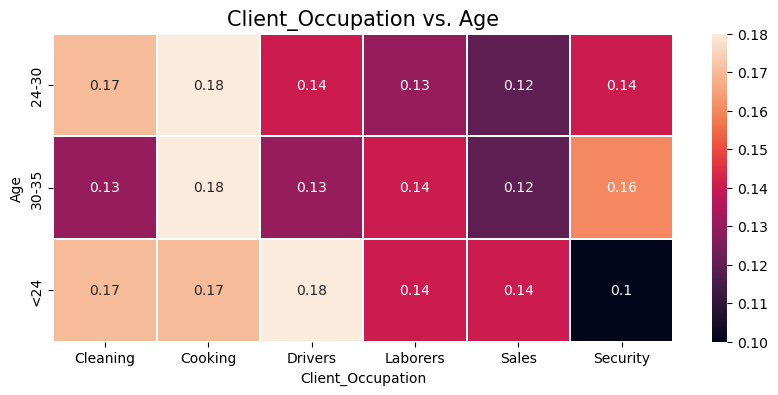

In [113]:
# Client_Occupation vs. Age
crosstab(filtered_age2, filtered_co2, 'Client_Occupation', 'Age')

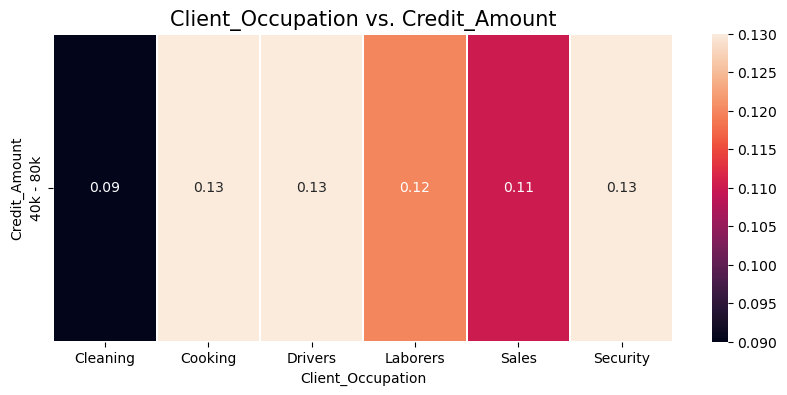

In [114]:
# Client_Occupation vs. Credit_Amount
crosstab(filtered_ca2, filtered_co2, 'Client_Occupation', 'Credit_Amount')

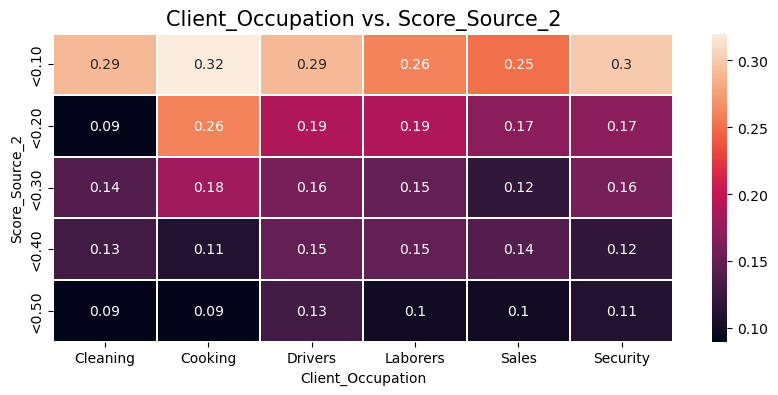

In [64]:
# Client_Occupation vs. Score_Source_2
crosstab(filtered_scc22, filtered_co2, 'Client_Occupation', 'Score_Source_2')

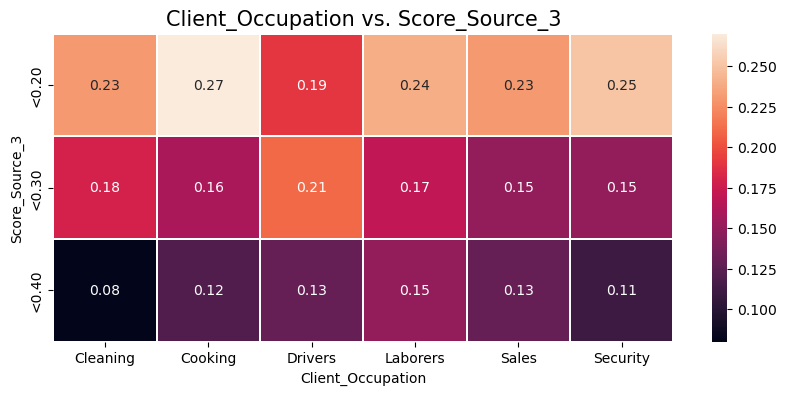

In [65]:
# Client_Occupation vs. Score_Source_3
crosstab(filtered_scc33, filtered_co2, 'Client_Occupation', 'Score_Source_3')

Client occupation represents the client/applicant's profession. Client Occupation and score souce 2 <0.10 has a significant impact on the default rate. In this category each variable is above 25%.  This wil be a key variable to target to reduce the overall default rate.

# Age Variable

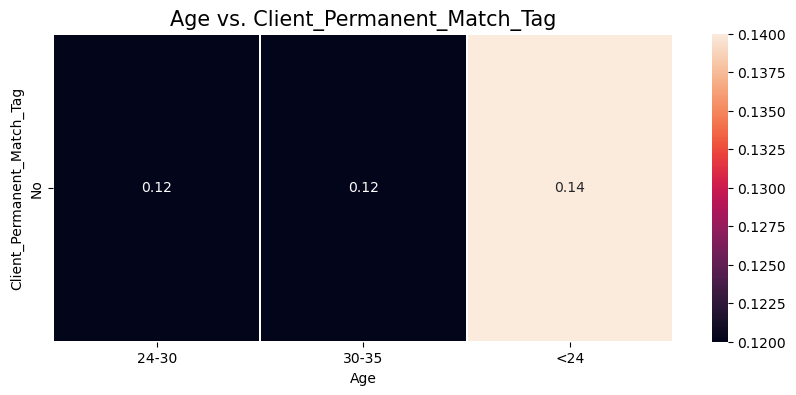

In [115]:
# Age vs. Client_Permanent_Match_Tag
crosstab(filtered_cpmt2, filtered_age2, 'Age', 'Client_Permanent_Match_Tag')

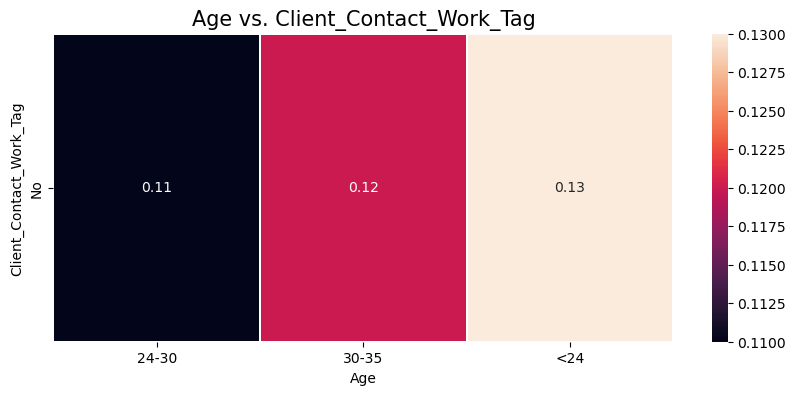

In [116]:
# Age vs. Client_Contact_Work_Tag
crosstab(filtered_ccwt2, filtered_age2, 'Age', 'Client_Contact_Work_Tag')

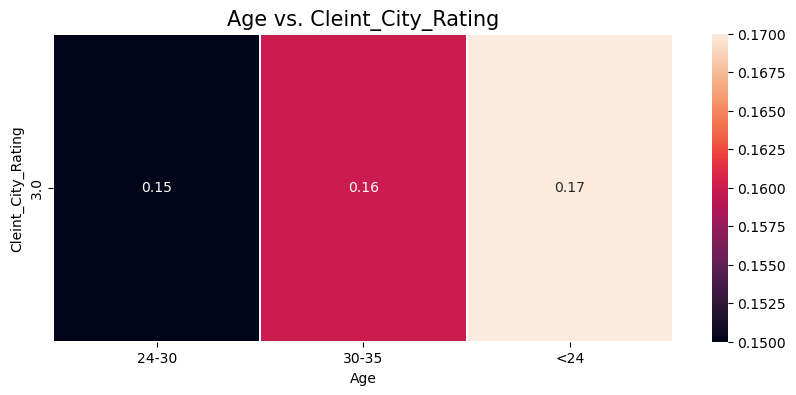

In [117]:
# Age vs. Cleint_City_Rating
crosstab(filtered_ccr2, filtered_age2, 'Age', 'Cleint_City_Rating')

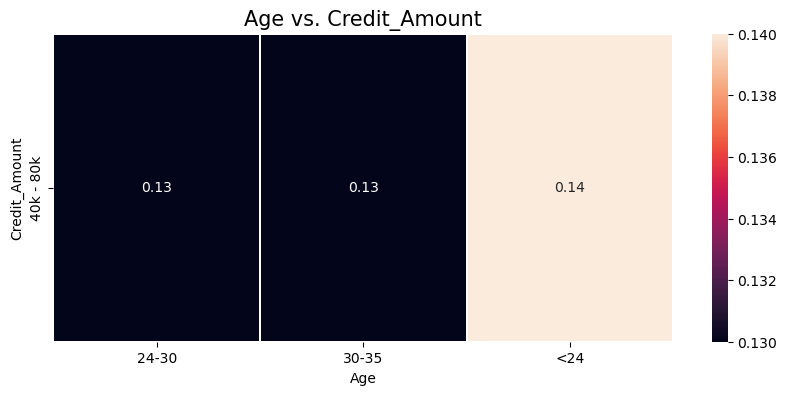

In [118]:
# Age vs. Credit_Amount
crosstab(filtered_ca2, filtered_age2, 'Age', 'Credit_Amount')

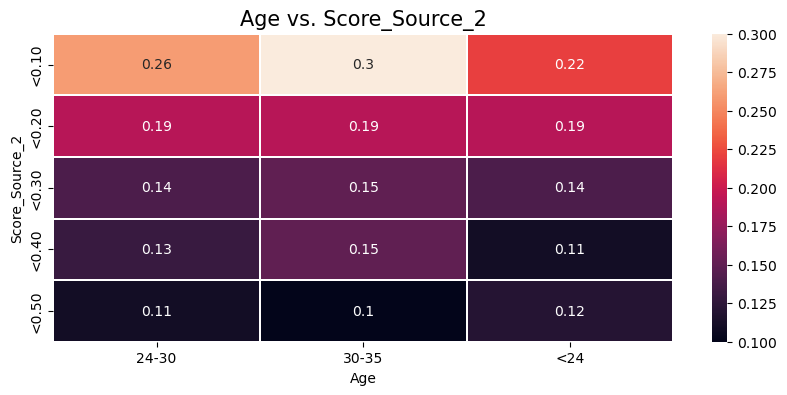

In [66]:
# Age vs. Score_Source_2
crosstab(filtered_scc22, filtered_age2, 'Age', 'Score_Source_2')

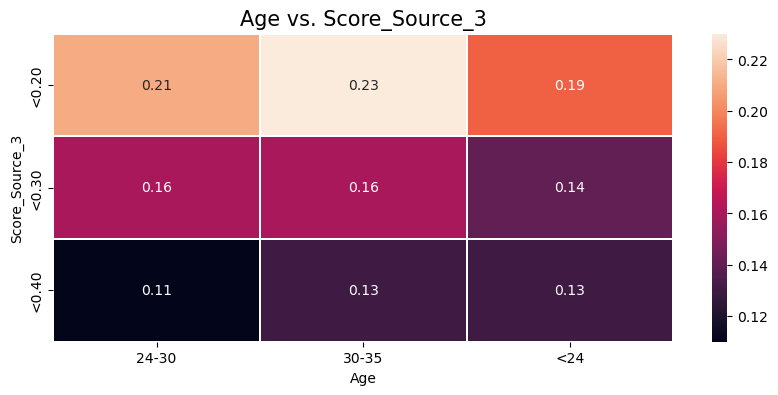

In [67]:
# Age vs. Score_Source_3
crosstab(filtered_scc33, filtered_age2, 'Age', 'Score_Source_3')

The age is calculated in days at the time of application submission. Age has a very signicant impact on the default rate. Each age group less than 35 regardless of the variable is at 9% or above. This variable should be flagged each applicant that meets this critera should be considered with the payment plan. Age could play a significant factor in the likelyhood of defaulting on a loan payment due to a variety of reasons in relation with job stability, income stability, and minimal credit history.

# Score Source Variable

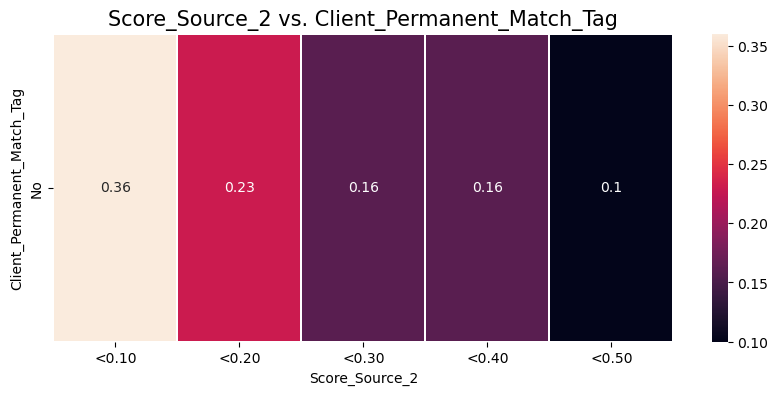

In [68]:
# Score_Source_2 vs. Client_Permanent_Match_Tag
crosstab(filtered_cpmt2, filtered_scc22, 'Score_Source_2', 'Client_Permanent_Match_Tag')

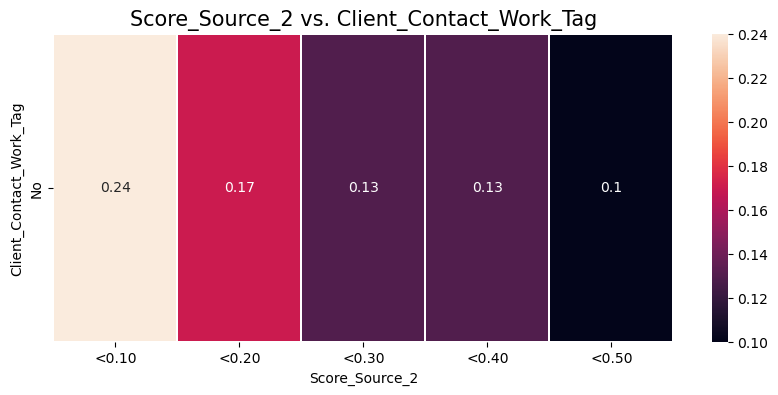

In [70]:
# Score_Source_2 vs. Client_Contact_Work_Tag
crosstab(filtered_ccwt2, filtered_scc22, 'Score_Source_2', 'Client_Contact_Work_Tag')

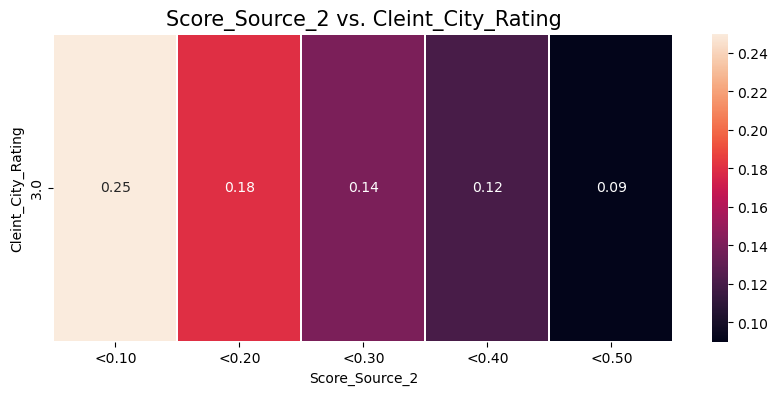

In [71]:
# Score_Source_2 vs. Cleint_City_Rating
crosstab(filtered_ccr2, filtered_scc22, 'Score_Source_2', 'Cleint_City_Rating')

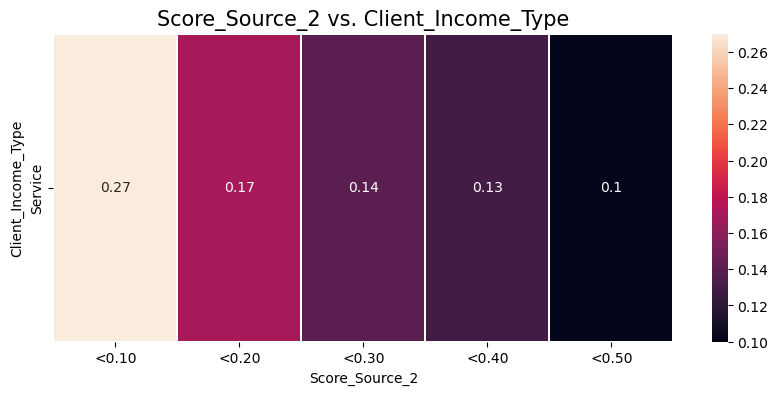

In [72]:
# Score_Source_2 vs. Client_Income_Type
crosstab(filtered_cit2, filtered_scc22, 'Score_Source_2', 'Client_Income_Type')

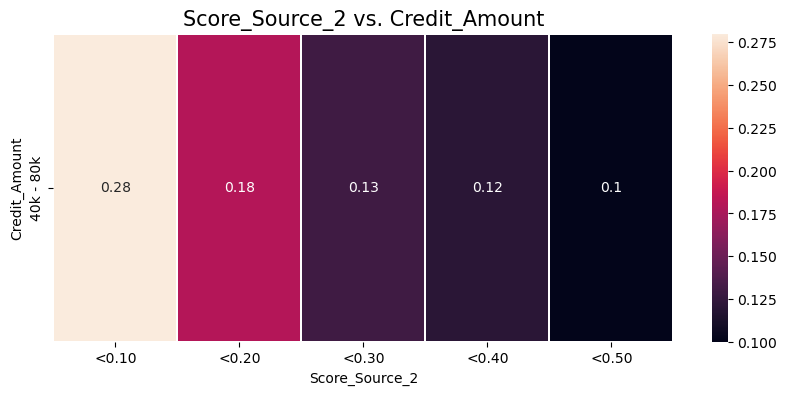

In [73]:
# Score_Source_2 vs. Credit_Amount
crosstab(filtered_ca2, filtered_scc22, 'Score_Source_2', 'Credit_Amount')

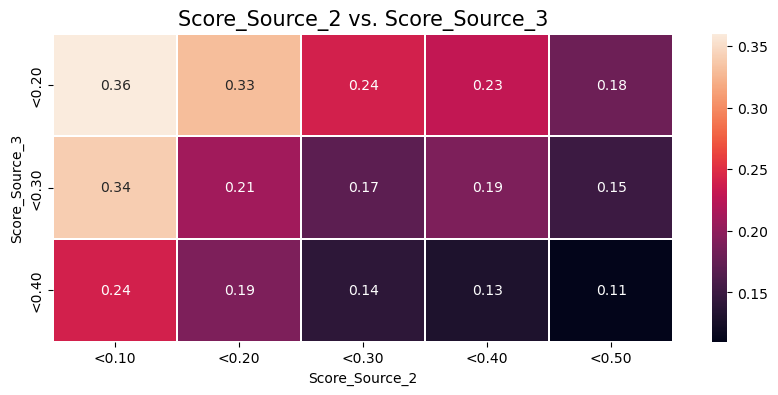

In [74]:
# Score_Source_2 vs. Score_Source_3
crosstab(filtered_scc33, filtered_scc22, 'Score_Source_2', 'Score_Source_3')

Score source 2 is a major contributor and has a positive relationship with each category.  The higher the score, the weaker
the relationship is, however, the default rate still meets the critera. <0.10 has he most signicant impact out of all the
variables. This variable is a normalized score from another source. This variable is in reference to financial and/or 
credit model. With a lower rating, one can conclude that the means to pay for a loan can vary on a month to month basis.

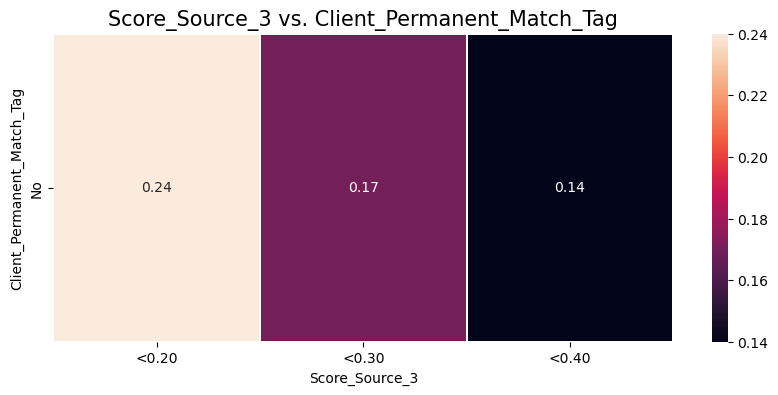

In [76]:
# Score_Source_3 vs. Client_Permanent_Match_Tag
crosstab(filtered_cpmt2, filtered_scc33, 'Score_Source_3', 'Client_Permanent_Match_Tag')

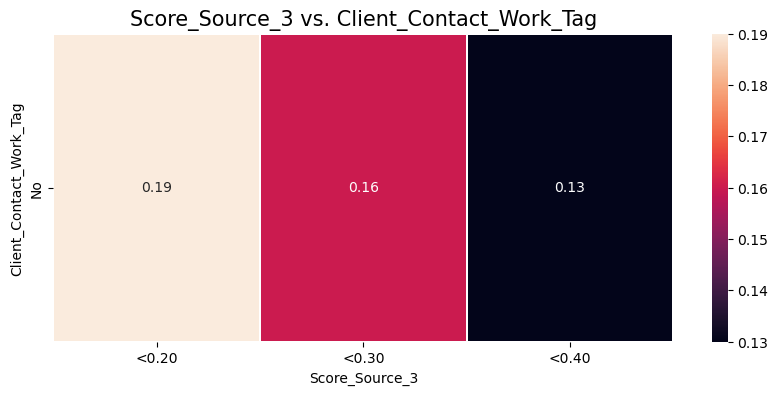

In [77]:
# Score_Source_3 vs. Client_Contact_Work_Tag
crosstab(filtered_ccwt2, filtered_scc33, 'Score_Source_3', 'Client_Contact_Work_Tag')

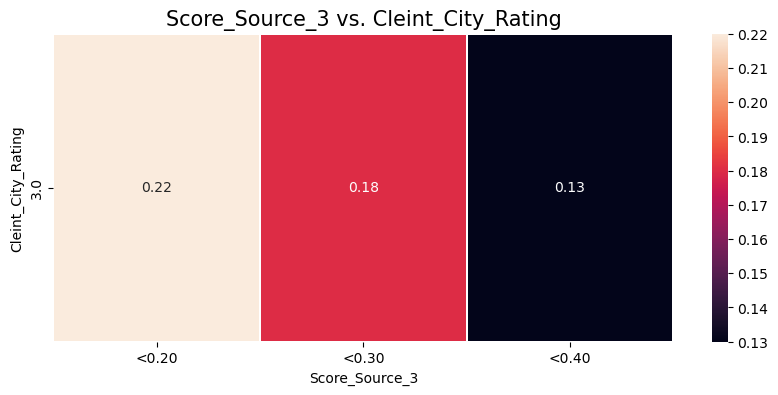

In [78]:
# Score_Source_3 vs. Cleint_City_Rating
crosstab(filtered_ccr2, filtered_scc33, 'Score_Source_3', 'Cleint_City_Rating')

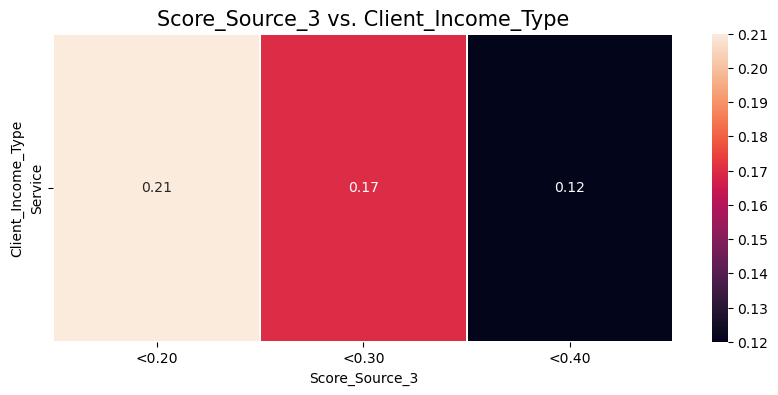

In [79]:
# Score_Source_3 vs. Client_Income_Type
crosstab(filtered_cit2, filtered_scc33, 'Score_Source_3', 'Client_Income_Type')

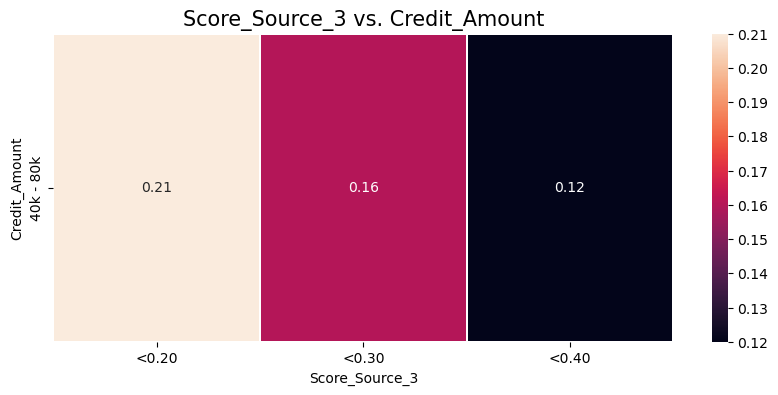

In [80]:
# Score_Source_3 vs. Credit_Amount
crosstab(filtered_ca2, filtered_scc33, 'Score_Source_3', 'Credit_Amount')

Score Source 3 is very similar to score source 2; however, the relationship is stronger as the variable increases. Like 
score source 2, the score source is a normalize score sourced from another source.  This variable is in reference to 
financial and/or credit model.

# Client Permanent Match Tag Variable

In [27]:
# Client_Permanent_Match_Tag vs. Client_Contact_Work_Tag
default_ct = pd.crosstab(filtered_ccwt2, filtered_cpmt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Permanent_Match_Tag    No
Client_Contact_Work_Tag         
No                          0.11


In [28]:
# Client_Permanent_Match_Tag vs. Cleint_City_Rating
default_ct = pd.crosstab(filtered_ccr2, filtered_cpmt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Permanent_Match_Tag    No
Cleint_City_Rating              
3.0                         0.17


In [29]:
# Client_Permanent_Match_Tag vs. Client_Income_Type
default_ct = pd.crosstab(filtered_cit2, filtered_cpmt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Permanent_Match_Tag    No
Client_Income_Type              
Service                     0.13


In [30]:
# Client_Permanent_Match_Tag vs. Credit_Amount
default_ct = pd.crosstab(filtered_ca2, filtered_cpmt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Permanent_Match_Tag    No
ca                              
40k - 80k                   0.14


Client_Permanent_Match_Tag has one of the weaker imapacts with each variable.  However, it still should be considered if the
applicant has this marked with other variables mentioned. This variables references clients who contact address does 
not match their permanent address.  This could be in relationship with clients who are constantly on the move and experiencing
constant change.

# Client Contact Work Tag Variable

In [31]:
# Client_Contact_Work_Tag vs. Cleint_City_Rating
default_ct = pd.crosstab(filtered_ccr2, filtered_ccwt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Contact_Work_Tag    No
Cleint_City_Rating           
3.0                      0.14


In [32]:
# Client_Contact_Work_Tag vs. Client_Income_Type
default_ct = pd.crosstab(filtered_cit2, filtered_ccwt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Contact_Work_Tag    No
Client_Income_Type           
Service                  0.11


In [33]:
# Client_Contact_Work_Tag vs. Credit_Amount
default_ct = pd.crosstab(filtered_ca2, filtered_ccwt2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Contact_Work_Tag    No
ca                           
40k - 80k                0.11


Client_Contact_Work_Tag is very similar to Client_Permanent_Match_Tag.  This variable Has a positive relationship with 
each variable and consistently meets the critera; speccifically if multiple variables are met. However, this variable is in
reference to if the work address does not match the contact address.  In most cases, clients/applicants travel for work.

# Client City Rating/Credit Amount Variable

In [34]:
# Cleint_City_Rating vs. Client_Income_Type
default_ct = pd.crosstab(filtered_cit2, filtered_ccr2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Cleint_City_Rating   3.0
Client_Income_Type      
Service             0.13


In [35]:
# Cleint_City_Rating vs. Credit_Amount
default_ct = pd.crosstab(filtered_ca2, filtered_ccr2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Cleint_City_Rating   3.0
ca                      
40k - 80k           0.14


In [36]:
# Credit_Amount vs. Client_Income_Type
default_ct = pd.crosstab(filtered_ca2, filtered_cit2, values=nbfi['Default'], aggfunc='mean').round(2)
print(default_ct)

Client_Income_Type  Service
ca                         
40k - 80k              0.11


Cleint_City_Rating and credit amount group are very similar. The default rating significantly rises as the city 
has a higher rating. This specific, rating of 3.0 is the highest.  Tyically, a higher city rating comes with a stronger economical foundations. Higher economical foundations also relates to lower interest rates and better access to credit.  Higher city rating can also increase the greater variance from each neighborhood.

# Conclusion

Overall scource source 2 and 3 have the biggest impact on the overall default percentage and should be a targeting point
for reducing the default rate.  Specifically if the score is <0.20 and <0.10.  The default rate is consistently, and in more
cases, significantly above the average default rate of 8.1%.  However, each one of the variables have a significantly higher default rate when multiple variables are met.  All these variables are in relation with one another and all contribute to the likelyhood of client/applicants defaulting on payments.  Reasseing the approach to lending out loans should be consisdered.  A multitude of factors can contribute to a default on payment.  Economic conditions, client/applicant behavior, loan terms, and external factors such as job/economic stability can all impact default rates. A more lenient approach such as developing a payment plan in accordance with the current market conditions can have a positive impact on our clients, as well as increase monthly profits.